<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/ML_AI24_HT7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 7: Fraud Detection Competition**

Добро пожаловать на финальное домашнее задание курса! Домашнее задание направлено на систематизацию всех знаний, полученных в процессе учебы.

В нём Вы потренируетесь применять навыки построения пайплайнов машинного обучения, приобретенные в курсе от точки разведочного анализа данных до построения и валидации моделей машинного обучения.

## **Задача**
**Вы будете решать задачу определения фрода:**

https://www.kaggle.com/competitions/fraud-detection-24

**Вам нужно будет:**
- в jupyter notebook провести исследование данных;
- в нём же построить модели и оценить их качество;
- отправить посылку на Kaggle.

Более подробное описание шагов - в ноутбуке ниже.

## **Оценивание и баллы**
- В EDA и во всей работе будут оцениваться полнота и **выводы**;
- При обучении моделей старайтесь обоснованно подходить к их выбору, избегая простого перебора;

**Максимальный балл** - 10 (+ бонусы за Kaggle, см. ниже).


Мягкий дедлайн (окончание соревнования на Kaggle): **15 марта 23:59**


# **Базовое решение и пример формирования файла под submission**


In [1]:
!wget --no-check-certificate 'https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0' -O train_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/cmy01z5fw7ohlmd/train_identity.csv?dl=0' -O train_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/7thqkuxnwsa7njj/test_transaction.csv?dl=0' -O test_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/b40nvbb9e2usd5w/test_identity.csv?dl=0' -O test_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/arkyoz0bel8z4d2/sample_submission.csv?dl=0' -O sample_submission.csv

--2025-02-26 22:58:07--  https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0
Распознаётся www.dropbox.com (www.dropbox.com)… 2620:100:6022:18::a27d:4212, 162.125.66.18
Подключение к www.dropbox.com (www.dropbox.com)|2620:100:6022:18::a27d:4212|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0 [переход]
--2025-02-26 22:58:08--  https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0
Повторное использование соединения с [www.dropbox.com]:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://uce841c0b92cc97a517a47cfcb4e.dl.dropboxusercontent.com/cd/0/inline/Ck6IUPWFt6UFDz6U_3HSA9uhDmW2IBg3sAH81xCPfkoWZ4A63UYd3oIJ5aKew4Sse6QeyteMfQcLzWXaJ0WBgUQr8VZT8LYXaKGpeZrNdm7APtL6gyfTGvf7Hjc5Ruge_6BA0kAJM89AHQPqAxotP6OR/file# [переход]
--2025-02-26 22:58:08--  https

In [9]:
pip freeze

absl-py==2.1.0
accelerate==0.34.2
adagio==0.2.6
aiohappyeyeballs==2.5.0
aiohttp==3.11.13
aiohttp-cors==0.7.0
aiosignal==1.3.2
alembic==1.14.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.6.2.post1
appdirs==1.4.4
appnope==0.1.4
asttokens==2.4.1
astunparse==1.6.3
async-timeout==5.0.1
attrs==24.2.0
autogluon==1.2
autogluon.common==1.2
autogluon.core==1.2
autogluon.features==1.2
autogluon.multimodal==1.2
autogluon.tabular==1.2
autogluon.timeseries==1.2
beautifulsoup4==4.12.3
blis==0.7.11
boto3==1.37.9
botocore==1.37.9
cachetools==5.5.2
catalogue==2.0.10
catboost==1.2.7
causalml==0.15.2
certifi==2024.8.30
charset-normalizer==3.4.0
citeproc-py==0.6.0
click==8.1.7
cloudpathlib==0.21.0
cloudpickle==3.1.0
colorama==0.4.6
colorful==0.5.6
colorlog==6.9.0
colour==0.1.5
comm==0.2.2
confection==0.1.5
contourpy==1.3.0
coreforecast==0.0.12
cycler==0.12.1
cymem==2.0.11
Cython==0.29.34
dacite==1.8.1
datasets==3.3.2
debugpy==1.8.8
decorator==5.1.1
defusedxml==0.7.1
dill==0.3.8
distlib==0

In [1]:
!pip install catboost -q
!pip install lightgbm -q
!pip install xgboost -q

In [7]:
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score
from scipy import stats
import lightgbm as lgb
from autogluon.tabular import TabularDataset, TabularPredictor

import warnings
warnings.filterwarnings('ignore')

In [230]:
INPUT_DIR = '.'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

In [49]:
df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_train.shape, df_test.shape

((417559, 432), (172981, 431))

Baseline решение

In [50]:
object_cols = []
for idx, col in tqdm(enumerate(df_train.columns.drop('isFraud'))):
    if df_train[col].dtype == 'O':
      object_cols.append(idx)

431it [00:00, 83045.99it/s]


In [51]:
X_train = df_train.drop('isFraud', axis=1)
X_train = X_train.fillna('')
y_train = df_train['isFraud'].values

cb = CatBoostClassifier(iterations=1000)
cb.fit(X_train, y_train, object_cols, )

Learning rate set to 0.135513
0:	learn: 0.4948059	total: 468ms	remaining: 7m 47s
1:	learn: 0.3674393	total: 856ms	remaining: 7m 7s
2:	learn: 0.2838117	total: 1.22s	remaining: 6m 47s
3:	learn: 0.2243549	total: 1.61s	remaining: 6m 41s
4:	learn: 0.1918267	total: 2.01s	remaining: 6m 39s
5:	learn: 0.1694406	total: 2.38s	remaining: 6m 34s
6:	learn: 0.1505721	total: 2.75s	remaining: 6m 29s
7:	learn: 0.1377722	total: 3.13s	remaining: 6m 28s
8:	learn: 0.1305513	total: 3.48s	remaining: 6m 23s
9:	learn: 0.1247327	total: 3.8s	remaining: 6m 16s
10:	learn: 0.1196464	total: 4.1s	remaining: 6m 8s
11:	learn: 0.1163099	total: 4.47s	remaining: 6m 8s
12:	learn: 0.1137998	total: 4.81s	remaining: 6m 5s
13:	learn: 0.1114990	total: 5.16s	remaining: 6m 3s
14:	learn: 0.1091998	total: 5.53s	remaining: 6m 3s
15:	learn: 0.1079018	total: 5.83s	remaining: 5m 58s
16:	learn: 0.1069652	total: 6.14s	remaining: 5m 55s
17:	learn: 0.1055788	total: 6.47s	remaining: 5m 53s
18:	learn: 0.1044628	total: 6.82s	remaining: 5m 52s


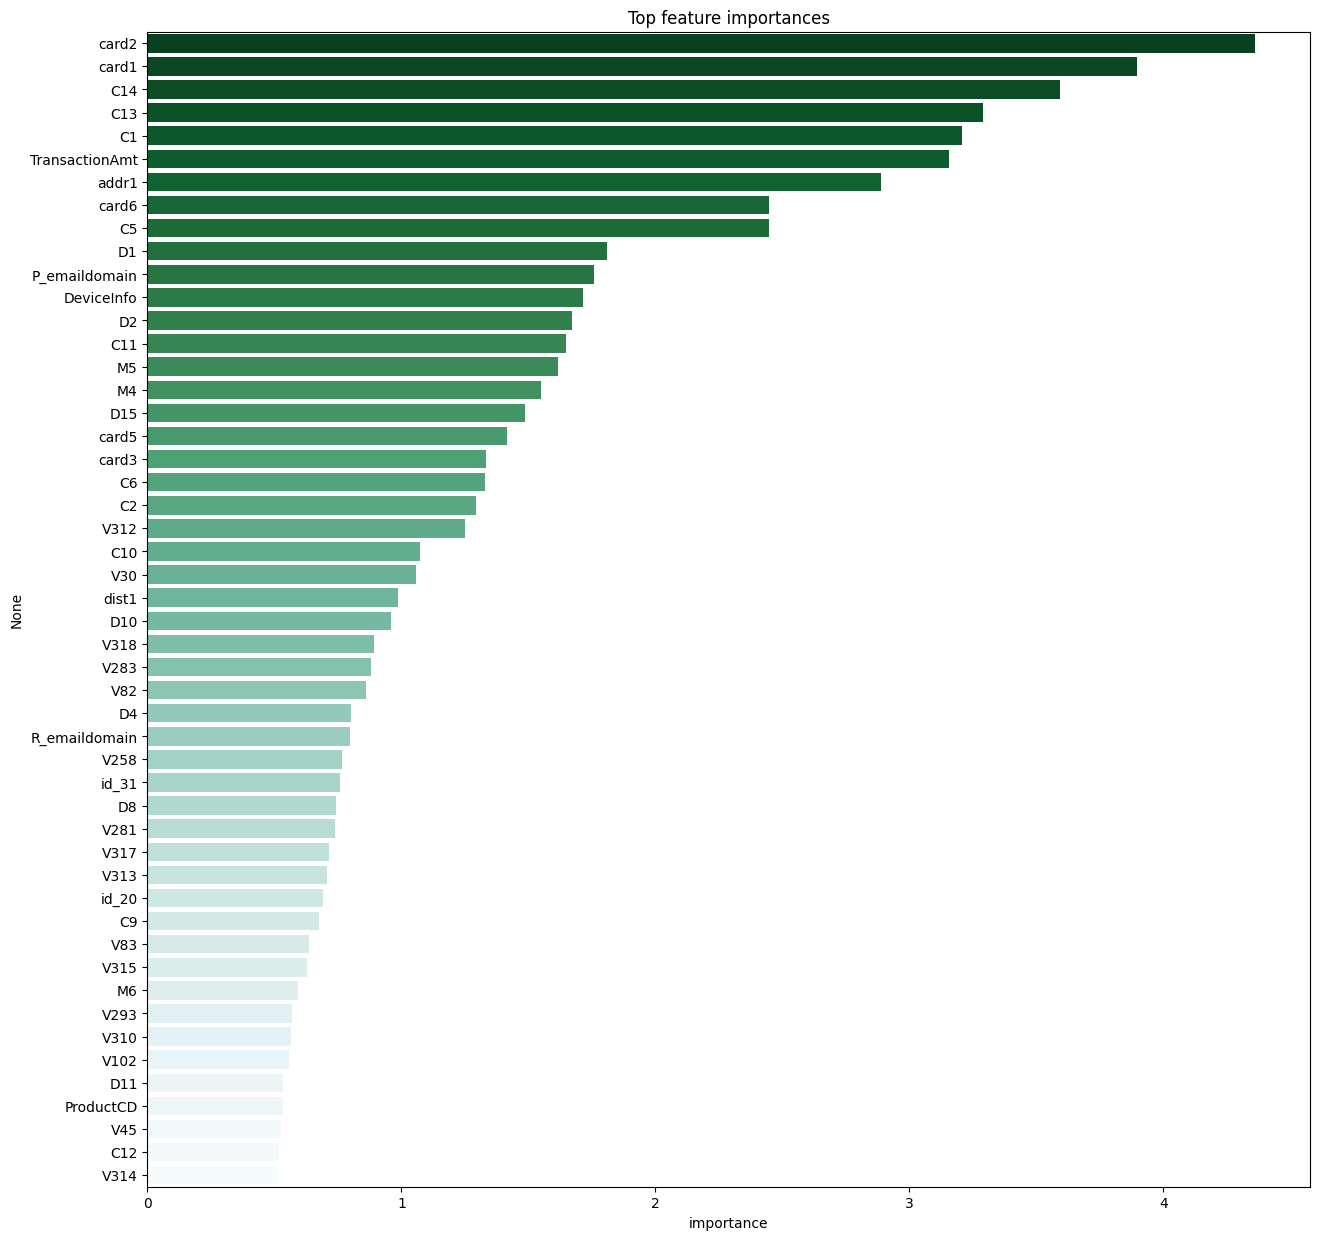

In [52]:
fe = pd.DataFrame(cb.feature_importances_, index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=False).head(50)

plt.figure(figsize=(15, 15))
sns.barplot(x=fe['importance'], y=fe.index, palette="BuGn_r")
plt.title('Top feature importances')
plt.show()

In [7]:
predictions = cb.predict_proba(df_test.fillna(''))

In [8]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 0]})
sub.head()

,TransactionID,isFraud
0,3404559,0.978714
1,3404560,0.935724
2,3404561,0.946864
3,3404562,0.978714
4,3404563,0.970637


In [ ]:
# Сохранение baseline submission
sub.to_csv('submission_baseline.csv', index=False)

### **Примечания:**

**1. Оценка качества и Submission File**
- Ответом является число от 0 до 1, метрикой качества - AUC-ROC.
- Структура Submission File:
 - для каждого значения *TransactionID* в тестовых данных вы должны предсказать **вероятность** для столбца *isFraud*.
 - в файле у вас должно быть две колонки: `TransactionID` и`isFraud`  **для каждой транзакции в датасете**.

**2. Объем данных**

Поскольку набор данных объемный, могут быть проблемы с переполнением памяти в Collab. Для решения проблемы можете использовать функцию из [этого ноутбука](https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=V2L1Nl5CTMMl), разобравшись, что она делает с данными.

# **Задание 1 (2 балла)**

Проведите EDA (разведочный анализ данных):
* проанализируйте признаки, их особенности и связь с целевой переменной
* проанализируйте целевую переменную
* оцените степень попарной взаимосвязи признаков, а также связи признаков и целевой переменной
* по результатам исследований сделайте необходимую обработку данных (удаление дублей, работа с пропусками, с категориальными столбцами (если они есть), работа с аномалиями, другие преобразования признаков)

Важно, что EDA всегда сопровождается выводами - не забудьте об этом.

In [2]:
INPUT_DIR = '.'
train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))
df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')
df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

In [3]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [233]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417559 entries, 0 to 417558
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.4+ GB


In [234]:
df_train.describe(include='all')

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,4.175590e+05,417559.000000,4.175590e+05,417559.000000,417559,417559.000000,410996.000000,416738.000000,416730,414578.000000,...,107961,62116.000000,57819,62168,108273,108273,108273,108273,108124,91959
unique,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,4,NaN,...,110,NaN,183,4,2,2,2,2,2,1551
top,NaN,NaN,NaN,NaN,W,NaN,NaN,NaN,visa,NaN,...,chrome 63.0,NaN,1920x1080,match_status:2,T,F,T,T,desktop,Windows
freq,NaN,NaN,NaN,NaN,301297,NaN,NaN,NaN,272753,NaN,...,21821,NaN,13466,46931,62152,102536,84398,57779,66324,36841
mean,3.195779e+06,0.035255,4.976936e+06,134.666566,NaN,9865.320371,363.474253,153.347864,NaN,199.687439,...,NaN,26.635327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.205390e+05,0.184424,3.099220e+06,238.166118,NaN,4900.674210,158.146603,11.566162,NaN,40.783018,...,NaN,3.787343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.987000e+06,0.000000,8.640000e+04,0.251000,NaN,1000.000000,100.000000,100.000000,NaN,100.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.091390e+06,0.000000,2.072820e+06,42.950000,NaN,6019.000000,215.000000,150.000000,NaN,166.000000,...,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.195779e+06,0.000000,4.822648e+06,68.950000,NaN,9633.000000,361.000000,150.000000,NaN,226.000000,...,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.300168e+06,0.000000,7.786364e+06,125.000000,NaN,14128.000000,512.000000,150.000000,NaN,226.000000,...,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# смотрим корреляцию признаков (топ-50) с целевой переменной
num_cols = [col for col in df_train.columns if df_train[col].dtype in ('int64', 'float64')]
df_train[num_cols].corr()['isFraud'].abs().sort_values(ascending=False)

isFraud    1.000000
V257       0.369941
V244       0.359899
V242       0.354488
V246       0.351318
             ...   
V1         0.000870
V334       0.000585
V305       0.000512
V241       0.000400
V107            NaN
Name: isFraud, Length: 403, dtype: float64

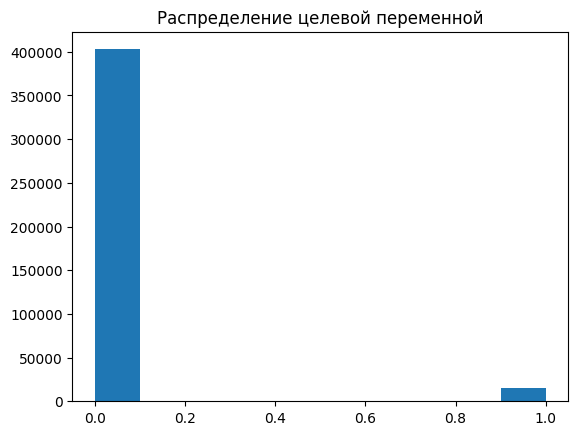

In [7]:
plt.hist(df_train['isFraud'])
plt.title('Распределение целевой переменной')
plt.show()

`Исходя из описания датасета на каггле + визуального просмотра данных можно предположить, что:`

- Посмотреть пропуски в переменных, заполнить их или удалить такие признаки
- Нужно проверить/трансформировать следующие категориальные признаки: ProductCD, card4, card6, P_emaildomain, R_emaildomain, M1-M9, DeviceType, DeviceInfo, id_12-id_38
- Нужно трансформировать (но много уник значений, возможно биниризировать) категориальные признаки: card1, card2, card3, card5, addr1, addr2 


In [5]:
# обработаем признаки с доменами
for col in ['P_emaildomain', 'R_emaildomain']:
    df_train[col + '_suffix'] = df_train[col].map(lambda x: str(x).split('.')[-1])
    df_test[col + '_suffix'] = df_test[col].map(lambda x: str(x).split('.')[-1])

df_train['same_emaildomain'] = (df_train['P_emaildomain'] == df_train['R_emaildomain']).astype('uint8')
df_test['same_emaildomain'] = (df_test['P_emaildomain'] == df_test['R_emaildomain']).astype('uint8')

In [6]:
# скомбинируем признаки, которые входят в топ-50 по важности признаков в бейзлайне
pairs = [
    ('card3', 'card5')
    ]

for col1, col2 in pairs:
    new_col_name = col1 + '_' + col2
    df_train[new_col_name] = df_train[col1].astype(str) + '_' + df_train[col2].astype(str)
    df_test[new_col_name] = df_test[col1].astype(str) + '_' + df_test[col2].astype(str)

In [7]:
# мета-признаки - исходя из частоты встречаемости в выборке
for col in ['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'DeviceType', 'DeviceInfo']:
    card_freq = df_train[col].value_counts().to_dict()
    df_train['{}_cnt'.format(col)] = df_train[col].map(card_freq)
    df_test['{}_cnt'.format(col)] = df_test[col].map(card_freq)

In [ ]:
# используем агрегированние
for col in ['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'DeviceType', 'DeviceInfo']:
    for agg_type in ['mean', 'median', 'min', 'max']:
        agg_col_name = 'TransactionAmt_{}_{}'.format(col, agg_type)
        card_agg = df_train.groupby(col)['TransactionAmt'].agg([agg_type]).rename({agg_type: agg_col_name}, axis=1)
        df_train = df_train.merge(card_agg, how='left', on=col)
        df_test = df_test.merge(card_agg, how='left', on=col)

In [9]:
# прологарифируем смещенный признак TransactionAmt
df_train['TransactionAmt_log'] = np.log1p(df_train['TransactionAmt'])
df_test['TransactionAmt_log'] = np.log1p(df_test['TransactionAmt'])

# достанем признак "Центы"
df_train['TransactionAmt_Cents'] = np.modf(df_train['TransactionAmt'])[0] * 100
df_test['TransactionAmt_Cents'] = np.modf(df_test['TransactionAmt'])[0] * 100

# удалим изначальный признак
df_train.drop('TransactionAmt', axis=1, inplace=True)
df_test.drop('TransactionAmt', axis=1, inplace=True)

In [10]:
# заполним пропуски в категориальных признаках значением "unseen_category", а в вещественных - "-1"
for col in tqdm(df_train.columns.drop('isFraud')):
    if df_train[col].dtype == 'O':
        df_train[col] = df_train[col].fillna('unseen_category')
        df_test[col] = df_test[col].fillna('unseen_category')
        df_train[col] = df_train[col].astype('category')
        df_test[col] = df_test[col].astype('category')
    else:
        df_train[col] = df_train[col].fillna(-1)
        df_test[col] = df_test[col].fillna(-1)

100%|██████████| 488/488 [00:01<00:00, 263.18it/s]


In [ ]:


params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'n_jobs': -1,
    'n_estimators': 2000,
    'seed': 13,
    'early_stopping_rounds': 200,
}

scores = []

feature_importances = pd.DataFrame()
feature_importances['feature'] = df_train.drop(columns=['isFraud', 'TransactionID', 'TransactionDT']).columns

test_preds = []

# выделяем фолды
month_length = 3600 * 24 * 30
fold0_idx = df_train[df_train['TransactionDT'] < df_train['TransactionDT'].min() + month_length].index
fold1_idx = df_train[(df_train['TransactionDT'].min() + month_length <= df_train['TransactionDT']) & (df_train['TransactionDT'] < df_train['TransactionDT'].min() + 2 * month_length)].index
fold2_idx = df_train[(df_train['TransactionDT'].min() + 2 * month_length <= df_train['TransactionDT']) & (df_train['TransactionDT'] < df_train['TransactionDT'].min() + 3 * month_length)].index
fold3_idx = df_train[df_train['TransactionDT'].min() + 3 * month_length <= df_train['TransactionDT']].index
folds_idx = [fold0_idx, fold1_idx, fold2_idx, fold3_idx]

# выделяем идентификационный и временной признаки и удаляем полные дубликаты
df_train = df_train.drop(['TransactionID', 'TransactionDT'], axis=1).drop_duplicates()
df_test.drop(['TransactionID', 'TransactionDT'], axis=1)

for i in range(len(folds_idx)):
    X_train = df_train.drop(folds_idx[i], axis=0)
    y_train = X_train['isFraud'].values
    X_val = df_train.iloc[folds_idx[i]]
    y_val = X_val['isFraud'].values
    X_train = X_train.drop('isFraud', axis=1)
    X_val = X_val.drop('isFraud', axis=1)

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    lgb_model = lgb.train(params, lgb_train, valid_sets=lgb_eval)

    feature_importances['fold_{}'.format(i)] = lgb_model.feature_importance()

    y_pred = lgb_model.predict(X_val)
    score_fold = roc_auc_score(y_val, y_pred)
    scores.append(score_fold)
    y_test_pred = lgb_model.predict(df_test)
    test_preds.append(y_test_pred)

for i in range(len(scores)):
    print('Fold {}, AUC-ROC: {:.5f}'.format(i, scores[i]))
print('CV AUC-ROC: {:.5f}'.format(np.mean(scores)))

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 11320, number of negative: 271900
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.149940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36679
[LightGBM] [Info] Number of data points in the train set: 283220, number of used features: 484
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039969 -> initscore=-3.178863
[LightGBM] [Info] Start training from score -3.178863
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[710]	valid_0's auc: 0.906066
[LightGBM] [Warning] Categorical features with more bins than the configured max

In [472]:
fold_cols = [col for col in feature_importances.columns if col.startswith('fold_')]
feature_importances['average'] = feature_importances[fold_cols].mean(axis=1)
feature_importances.head()

,feature,fold_0,fold_1,fold_2,fold_3,average
0,ProductCD,33,37,34,41,36.25
1,card1,622,546,262,359,447.25
2,card2,397,322,157,188,266.00
3,card3,5,5,1,6,4.25
4,card4,0,0,0,1,0.25


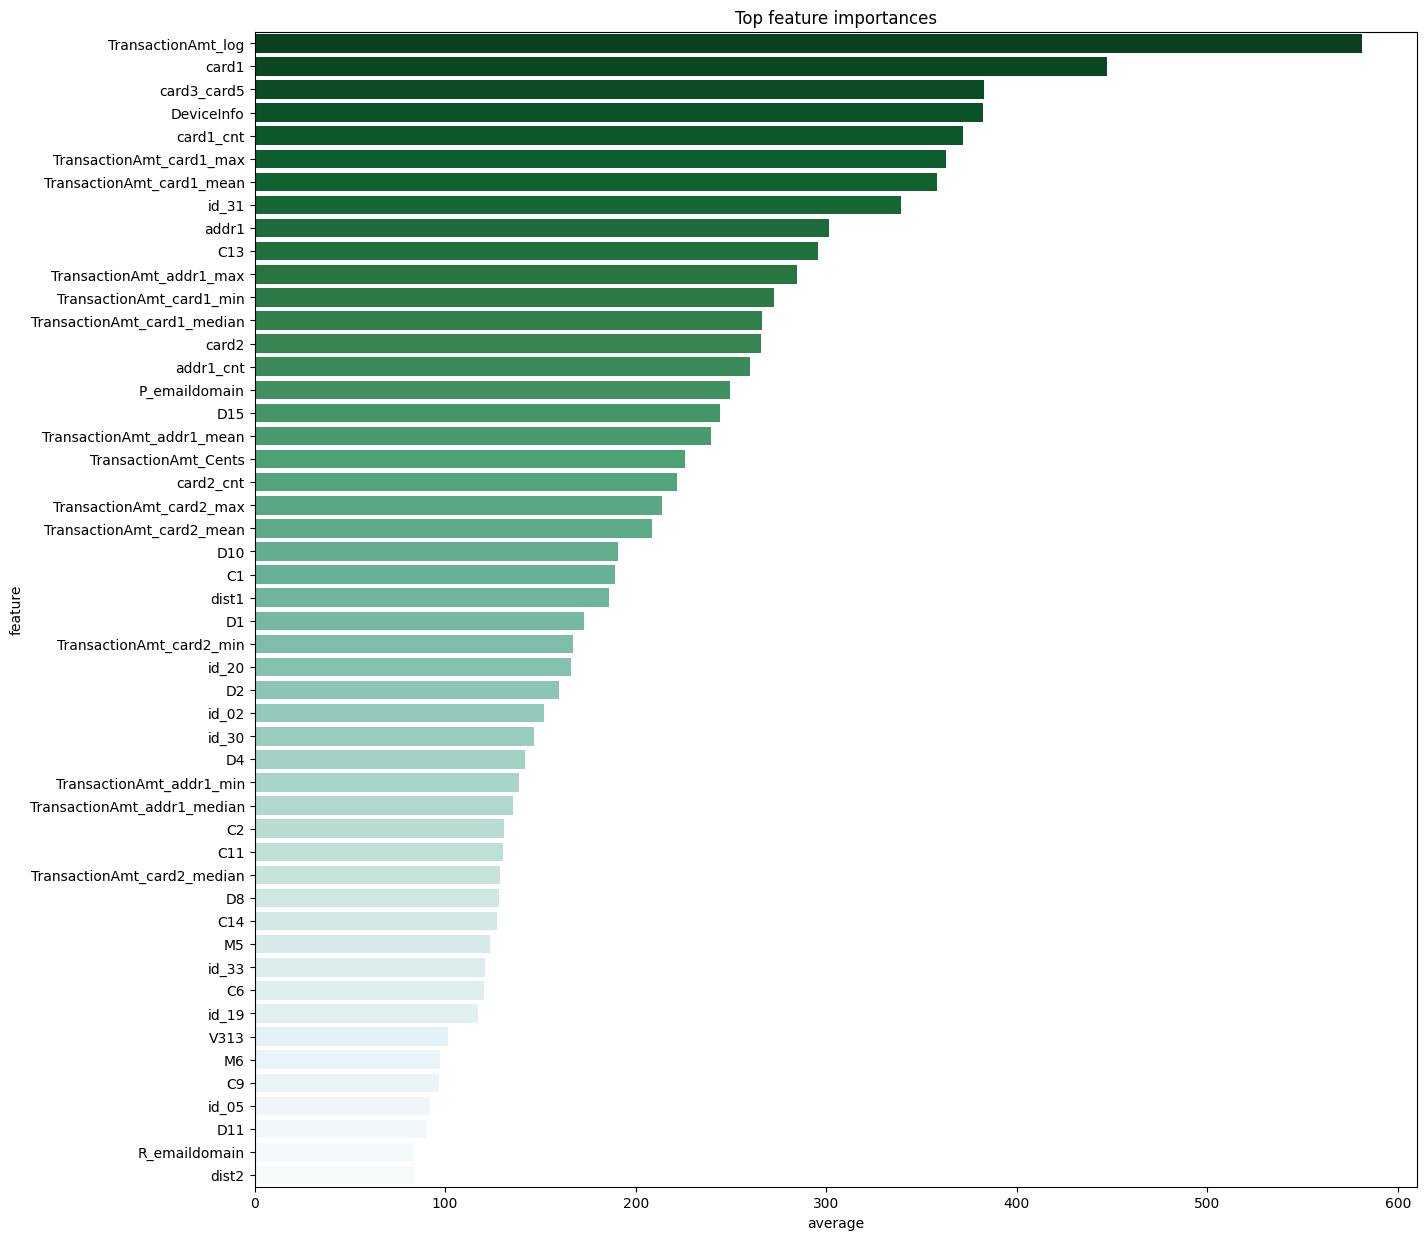

In [473]:
plt.figure(figsize=(15, 15))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")
plt.title('Top feature importances')
plt.show()

In [474]:
final_pred = np.average(test_preds, axis=0)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': final_pred})
sub.to_csv('submissions/submission_try_2.csv', index=False)

`Чуть улучшив бейзлайн-решение с Feature Engineering получил скор на каггле - 0.92. В моменте попал даже на 1 место :)`

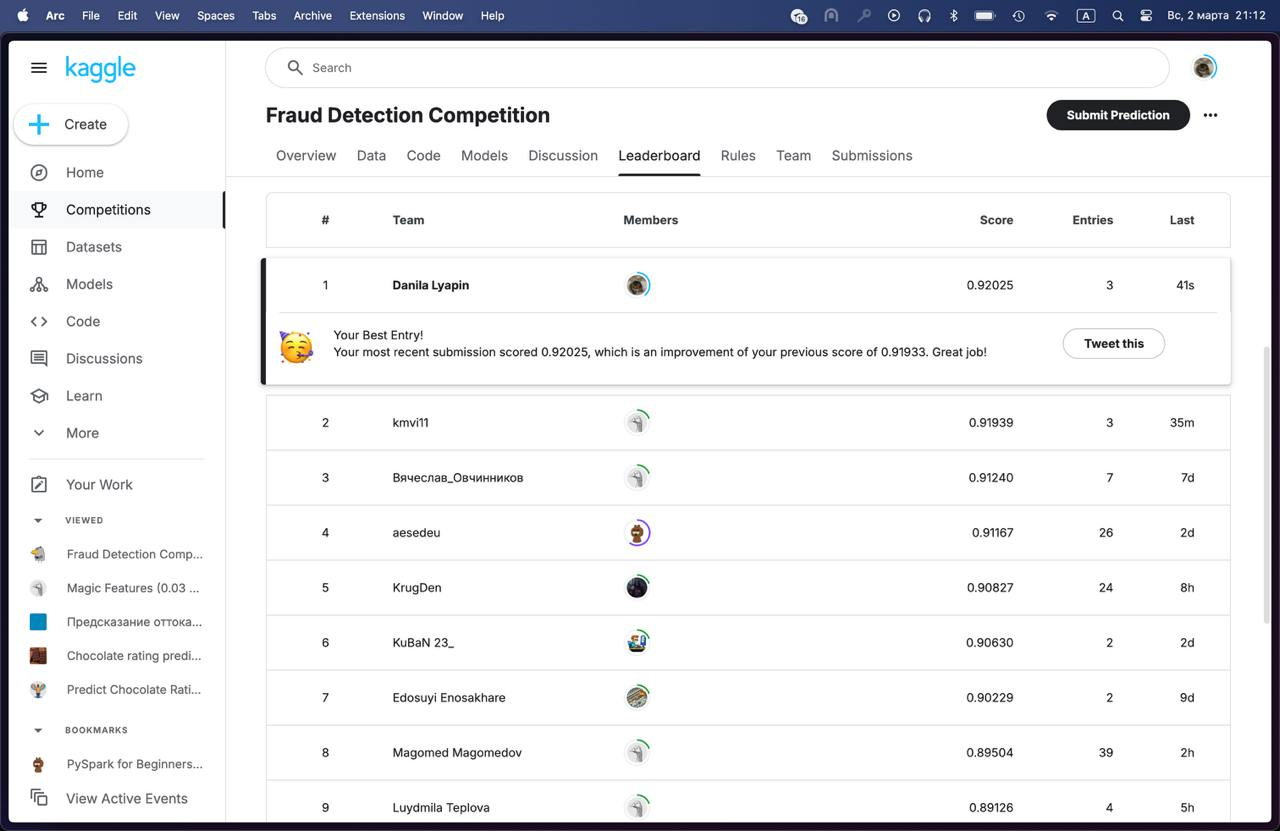

# **Задание 2 (3 балла)**

Обучите несколько ML-моделей для решения поставленной задачи.
Оцените их качество двумя способами:

1) на кросс-валидации

2) на лидерборде

Подберите число фолдов на кросс-валидации так, чтобы метрики, которые вы видите, были максимально близки на кросс-валидации и на лидерборде.

По результатам экспериментов постройте таблицу:
* в каждой строке таблицы - результаты одной модели
* по столбцам: качество на кросс-валидации, качество на лидерборде, модель с гиперпараметрами
Полученную таблицу вставьте картинкой прямо в ноутбук после ячеек с кодом. Сделайте текстовые выводы.

`Рассмотрим наиболее популярные модели классического ML для задачи классификации:`

- Random Forest

- Градиентный бустинг (имплементации CatBoost и LightGBM)

- GaussianNB

- KNeighborsClassifier

- LogReg

- AdaBoostClassifier

`Сначала посмотрим на качество модели из коробки, а после подберем гиперпараметры для лучшей`

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from catboost import CatBoostClassifier
import lightgbm as lgb

X, y = df_train.drop(columns=['isFraud']), df_train['isFraud']
num_cols = [col for col in X.columns if X[col].dtype in ('int64', 'float64')]
cat_cols = [col for col in X.columns if X[col].dtype in ('O', 'category')]
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_data = pd.DataFrame(ohe.fit_transform(X[cat_cols]), columns=ohe.get_feature_names_out()).reset_index(drop=True)
scaler = StandardScaler()
num_data = pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols).reset_index(drop=True)
X = pd.concat([cat_data, num_data], axis=1)
X.columns = X.columns.str.replace(':', '_')

In [120]:
# случайный лес
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
cross_val_score(rf, X, y, cv=3, scoring='roc_auc', n_jobs=-1, verbose=3).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[CV] END ................................ score: (test=0.863) total time= 2.6min
[CV] END ................................ score: (test=0.641) total time= 2.6min
[CV] END ................................ score: (test=0.881) total time= 2.6min


0.7949688243455411

In [16]:
# LogReg
lr = LogisticRegression(random_state=42, n_jobs=-1)
cross_val_score(lr, X, y, cv=3, scoring='roc_auc', verbose=3).mean()

/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.807) total time=  51.0s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.845) total time=  46.3s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.845) total time=  46.8s


0.8321356228864171

In [19]:
# GaussianNB
naive = GaussianNB()
cross_val_score(naive, X, y, cv=3, scoring='roc_auc', verbose=3).mean()

[CV] END ................................ score: (test=0.538) total time=  12.7s
[CV] END ................................ score: (test=0.474) total time=  12.8s
[CV] END ................................ score: (test=0.477) total time=  12.8s


0.4961871039640995

In [21]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)
cross_val_score(knn, X, y, cv=3, scoring='roc_auc', verbose=3).mean()

[CV] END ................................ score: (test=0.728) total time=13.9min
[CV] END ................................ score: (test=0.740) total time=13.8min
[CV] END ................................ score: (test=0.724) total time=13.9min


0.7306412040805199

In [16]:
# AdaBoostClassifier (base=LogReg)
lr = LogisticRegression(random_state=42, n_jobs=-1)
ada = AdaBoostClassifier(lr, random_state=42)
cross_val_score(ada, X, y, cv=3, scoring='roc_auc', verbose=3).mean()

[CV] END ................................ score: (test=0.832) total time=10.4min
[CV] END ................................ score: (test=0.851) total time=10.2min
[CV] END ................................ score: (test=0.852) total time=10.4min


0.8449072726077936

In [17]:
# CatBoost
cb = CatBoostClassifier(random_state=42, logging_level='Silent', thread_count=-1)
cross_val_score(cb, X, y, cv=3, scoring='roc_auc', verbose=3).mean()

[CV] END ................................ score: (test=0.897) total time=  53.9s
[CV] END ................................ score: (test=0.747) total time=  53.0s
[CV] END ................................ score: (test=0.885) total time=  52.5s


0.8431039707425785

In [ ]:
# LightGBM
lgbm = lgb.LGBMClassifier(random_state=42, objective='binary')
cross_val_score(lgbm, X.values, y, cv=3, scoring='roc_auc', verbose=3).mean()

[LightGBM] [Info] Number of positive: 9814, number of negative: 268558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.157341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37185
[LightGBM] [Info] Number of data points in the train set: 278372, number of used features: 1108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309257
[LightGBM] [Info] Start training from score -3.309257
[CV] END ................................ score: (test=0.859) total time=  13.0s
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.163448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40199
[LightGBM] [Info] Number 

0.7901465481910241

| Название модели             | ROC-AUC на кросс-валидации (параметры по умолчанию) | Время обучения (мин)|
|-----------------------------|----------|----------|
| LogReg                      | 0.832    |    2     |
| KNeighborsClassifier        | 0.731    |    41    |
| GaussianNB                  | 0.496    |    0.5   |
| Random Forest               | 0.795    |    7     |
| AdaBoostClassifier (LogReg) | 0.845    |    31    |
| CatBoost                    | 0.843    |    2     |
| LightGBM                    | 0.790    |    0.5   |

`Наилучшее качество ожидаемо показали градиентные бустинги: AdaBoostClassifier (с базовой модель LogReg, хоть она и не рекомендуется к использованию в качестве базовой), CatBoost, а также логистическая регрессия. Попробуем подобрать гиперпараметры для этих моделей, а после отправить посылки на каггл, чтобы сравнить качество и подобрать оптимальное число фолдов.`

`P.S. поскольку AdaBoostClassifier обучается слишком долго, а дедлайн не вечен, то его выкину из рассмотрения.`


In [ ]:
# здесь сначала перебрал параметры penalty и class_weight, выбрав лучшие перебрал два оставшихся параметра
lr_params = {
    # 'penalty': [None, 'l1', 'l2', 'elasticnet'],
    # 'class_weight': [None, {0: 0.96, 1: 0.04}],
    'max_iter': np.array(stats.loguniform.rvs(50, 1000, size=5, random_state=42), dtype=int),
    'C': np.array(stats.loguniform.rvs(1e-4, 1e4, size=5, random_state=42)),
    
}

grid = GridSearchCV(LogisticRegression(penalty=None, class_weight=None, random_state=42, n_jobs=-1, verbose=False), lr_params, cv=3, scoring='roc_auc', refit=True, verbose=3)
grid.fit(X, y)
grid.best_estimator_.get_params(), grid.best_score_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END C=0.09915644566638401, max_iter=153;, score=0.795 total time= 1.1min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END C=0.09915644566638401, max_iter=153;, score=0.841 total time= 1.1min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END C=0.09915644566638401, max_iter=153;, score=0.845 total time= 1.1min
[CV 1/3] END C=0.09915644566638401, max_iter=862;, score=0.765 total time= 4.2min
[CV 2/3] END C=0.09915644566638401, max_iter=862;, score=0.824 total time= 4.3min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END C=0.09915644566638401, max_iter=862;, score=0.841 total time= 4.3min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END C=0.09915644566638401, max_iter=448;, score=0.782 total time= 2.5min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END C=0.09915644566638401, max_iter=448;, score=0.822 total time= 2.5min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END C=0.09915644566638401, max_iter=448;, score=0.845 total time= 2.5min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END C=0.09915644566638401, max_iter=300;, score=0.798 total time= 1.8min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END C=0.09915644566638401, max_iter=300;, score=0.826 total time= 1.8min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END C=0.09915644566638401, max_iter=300;, score=0.846 total time= 1.7min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END C=0.09915644566638401, max_iter=79;, score=0.818 total time=  46.1s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END C=0.09915644566638401, max_iter=79;, score=0.845 total time=  44.2s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END C=0.09915644566638401, max_iter=79;, score=0.842 total time=  44.6s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END C=4033.8008326003933, max_iter=153;, score=0.795 total time= 1.1min
[CV 2/3] END C=4033.8008326003933, max_iter=153;, score=0.841 total time= 1.1min
[CV 3/3] END C=4033.8008326003933, max_iter=153;, score=0.845 total time= 1.1min
[CV 1/3] END C=4033.8008326003933, max_iter=862;, score=0.765 total time= 4.3min
[CV 2/3] END C=4033.8008326003933, max_iter=862;, score=0.824 total time= 4.5min
[CV 3/3] END C=4033.8008326003933, max_iter=862;, score=0.841 total time= 4.5min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END C=4033.8008326003933, max_iter=448;, score=0.782 total time= 2.5min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END C=4033.8008326003933, max_iter=448;, score=0.822 total time= 2.4min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END C=4033.8008326003933, max_iter=448;, score=0.845 total time= 2.4min
[CV 1/3] END C=4033.8008326003933, max_iter=300;, score=0.798 total time= 1.7min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END C=4033.8008326003933, max_iter=300;, score=0.826 total time= 1.7min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END C=4033.8008326003933, max_iter=300;, score=0.846 total time= 1.7min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END .C=4033.8008326003933, max_iter=79;, score=0.818 total time=  43.7s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END .C=4033.8008326003933, max_iter=79;, score=0.845 total time=  43.4s
[CV 3/3] END .C=4033.8008326003933, max_iter=79;, score=0.842 total time=  42.8s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END .C=71.77141927992021, max_iter=153;, score=0.795 total time= 1.1min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END .C=71.77141927992021, max_iter=153;, score=0.841 total time= 1.0min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END .C=71.77141927992021, max_iter=153;, score=0.845 total time= 1.0min
[CV 1/3] END .C=71.77141927992021, max_iter=862;, score=0.765 total time= 4.2min
[CV 2/3] END .C=71.77141927992021, max_iter=862;, score=0.824 total time= 4.3min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END .C=71.77141927992021, max_iter=862;, score=0.841 total time= 4.3min
[CV 1/3] END .C=71.77141927992021, max_iter=448;, score=0.782 total time= 2.4min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END .C=71.77141927992021, max_iter=448;, score=0.822 total time= 2.4min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END .C=71.77141927992021, max_iter=448;, score=0.845 total time= 2.4min
[CV 1/3] END .C=71.77141927992021, max_iter=300;, score=0.798 total time= 1.7min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END .C=71.77141927992021, max_iter=300;, score=0.826 total time= 1.7min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END .C=71.77141927992021, max_iter=300;, score=0.846 total time= 1.7min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ..C=71.77141927992021, max_iter=79;, score=0.818 total time=  44.2s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ..C=71.77141927992021, max_iter=79;, score=0.845 total time=  42.2s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ..C=71.77141927992021, max_iter=79;, score=0.842 total time=  42.9s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END .C=6.155564318973028, max_iter=153;, score=0.795 total time= 1.0min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END .C=6.155564318973028, max_iter=153;, score=0.841 total time= 1.1min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END .C=6.155564318973028, max_iter=153;, score=0.845 total time= 1.0min
[CV 1/3] END .C=6.155564318973028, max_iter=862;, score=0.765 total time= 4.2min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END .C=6.155564318973028, max_iter=862;, score=0.824 total time= 4.3min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END .C=6.155564318973028, max_iter=862;, score=0.841 total time= 4.3min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END .C=6.155564318973028, max_iter=448;, score=0.782 total time= 2.4min
[CV 2/3] END .C=6.155564318973028, max_iter=448;, score=0.822 total time= 2.5min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END .C=6.155564318973028, max_iter=448;, score=0.845 total time= 2.4min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END .C=6.155564318973028, max_iter=300;, score=0.798 total time= 1.7min
[CV 2/3] END .C=6.155564318973028, max_iter=300;, score=0.826 total time= 1.7min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END .C=6.155564318973028, max_iter=300;, score=0.846 total time= 1.7min
[CV 1/3] END ..C=6.155564318973028, max_iter=79;, score=0.818 total time=  44.1s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ..C=6.155564318973028, max_iter=79;, score=0.845 total time=  43.0s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ..C=6.155564318973028, max_iter=79;, score=0.842 total time=  43.4s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END C=0.0017707168643537846, max_iter=153;, score=0.795 total time= 1.1min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END C=0.0017707168643537846, max_iter=153;, score=0.841 total time= 1.1min
[CV 3/3] END C=0.0017707168643537846, max_iter=153;, score=0.845 total time= 1.0min
[CV 1/3] END C=0.0017707168643537846, max_iter=862;, score=0.765 total time= 4.2min
[CV 2/3] END C=0.0017707168643537846, max_iter=862;, score=0.824 total time= 4.3min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END C=0.0017707168643537846, max_iter=862;, score=0.841 total time= 4.4min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END C=0.0017707168643537846, max_iter=448;, score=0.782 total time= 2.5min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END C=0.0017707168643537846, max_iter=448;, score=0.822 total time= 2.5min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END C=0.0017707168643537846, max_iter=448;, score=0.845 total time= 2.4min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END C=0.0017707168643537846, max_iter=300;, score=0.798 total time= 1.8min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END C=0.0017707168643537846, max_iter=300;, score=0.826 total time= 1.8min
[CV 3/3] END C=0.0017707168643537846, max_iter=300;, score=0.846 total time= 1.7min


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END C=0.0017707168643537846, max_iter=79;, score=0.818 total time=  45.7s


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END C=0.0017707168643537846, max_iter=79;, score=0.845 total time=  43.9s
[CV 3/3] END C=0.0017707168643537846, max_iter=79;, score=0.842 total time=  43.0s


({'C': 0.09915644566638401,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 79,
  'multi_class': 'auto',
  'n_jobs': -1,
  'penalty': None,
  'random_state': 42,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': False,
  'warm_start': False},
 0.8352484360855977)

In [77]:
best_lr = grid.best_estimator_
cross_val_score(best_lr, X, y, cv=3, scoring='roc_auc', verbose=3).mean()

[CV] END ................................ score: (test=0.818) total time=  44.5s
[CV] END ................................ score: (test=0.845) total time=  43.5s
[CV] END ................................ score: (test=0.842) total time=  43.7s


0.8352484360855977

In [ ]:
# поочередно перебрал основные гиперпараметры модели CatBoost
cb_params = {
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
    'loss_function': ['Logloss', 'CrossEntropy'],
    'auto_class_weights': [None, 'Balanced'],
    'iterations': np.array(stats.loguniform.rvs(100, 1000, size=3, random_state=42), dtype=int),
    'depth': np.array(stats.loguniform.rvs(3, 16, size=4, random_state=42), dtype=int),
    'learning_rate': np.array(stats.loguniform.rvs(1e-3, 0.3, size=3, random_state=42)),
    'l2_leaf_reg': np.array(stats.loguniform.rvs(1e-3, 100, size=3, random_state=42)),   
    # 'bagging_temperature': np.array(stats.loguniform.rvs(0.3, 1, size=3, random_state=42)),
    # 'random_strength': np.array(stats.loguniform.rvs(0, 1, size=3, random_state=42)),
    # 'border_count': np.array(stats.loguniform.rvs(32, 255, size=3, random_state=42), dtype=int)
}

cb = CatBoostClassifier(early_stopping_rounds=50, random_state=42, logging_level='Silent')
grid = GridSearchCV(cb, cb_params, cv=3, scoring='roc_auc', refit=False, verbose=3)
grid.fit(X, y)
grid.best_estimator_.get_params(), grid.best_score_

In [199]:
best_cb = CatBoostClassifier(iterations=892, learning_rate=0.008468008575248327, l2_leaf_reg=4.5705630998014515, depth=14, grow_policy='SymmetricTree', loss_function='Logloss', auto_class_weights='Balanced', early_stopping_rounds=50, random_state=42, logging_level='Silent')
cross_val_score(best_cb, X, y, cv=3, scoring='roc_auc', verbose=3).mean()

[CV] END ................................ score: (test=0.900) total time=16.6min
[CV] END ................................ score: (test=0.874) total time=17.1min
[CV] END ................................ score: (test=0.895) total time=17.3min


0.8898295966252691

In [289]:
# сделаем сабмишны с помощью каждой из модели
test_cat_data = pd.DataFrame(ohe.transform(df_test[cat_cols]), columns=ohe.get_feature_names_out()).reset_index(drop=True)
test_num_data = pd.DataFrame(scaler.transform(df_test[num_cols]), columns=num_cols).reset_index(drop=True)
X_test = pd.concat([test_cat_data, test_num_data], axis=1)
X_test.columns = X_test.columns.str.replace(':', '_')

In [ ]:
lr_pred = best_lr.predict(X_test)
sub_lr = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': lr_pred})
sub_lr.to_csv('submission_tuned_logreg.csv', index=False)

In [ ]:
best_cb.fit(X, y)
cb_pred = best_cb.predict(X_test)
sub_cb = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': cb_pred})
sub_cb.to_csv('submission_tuned_catboost.csv', index=False)

In [308]:
best_gbm = lgb.LGBMClassifier(objective='binary', boosting_type='gbdt', iterations=2_000, metric='auc', n_jobs=-1, seed=13, verbosity=-1)
X.columns = X.columns.str.replace(':', '_')
# X_train, X_val, y_train, y_val = train_test_split(X.drop(columns=['TransactionID', 'TransactionDT']), y, test_size=0.2, random_state=42)
best_gbm.fit(X.drop(columns=['TransactionID', 'TransactionDT']), y)
gbm_pred = best_gbm.predict(X_test.drop(columns=["TransactionID", "TransactionDT"]))
sub_gbm = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': gbm_pred})
sub_gbm.to_csv('submission_tuned_lightgbm.csv', index=False)

`Какие результаты получил:`

| Название модели   | ROC-AUC на кросс-валидации| ROC-AUC на kaggle|
|-------------------|---------------------------|------------------|
| LogReg            | 0.835                     |    0.638         |
| CatBoost          | 0.890                     |    0.800         |

`Подберем оптимальное количество фолдов на лучшей модели - CatBoost, чтобы эти значения +- совпадали.`

In [23]:
results = []
for k in tqdm(np.arange(2, 8)):
    best_cb = CatBoostClassifier(iterations=892, learning_rate=0.008468008575248327, l2_leaf_reg=4.5705630998014515, depth=14, grow_policy='SymmetricTree', loss_function='Logloss', auto_class_weights='Balanced', early_stopping_rounds=50, random_state=42, logging_level='Silent')
    mean_auc = cross_val_score(best_cb, X, y, cv=k, scoring='roc_auc', verbose=3).mean()
    results.append((k, mean_auc))

  0%|          | 0/6 [00:00<?, ?it/s]

[CV] END ................................ score: (test=0.896) total time=18.2min


 17%|█▋        | 1/6 [37:06<3:05:33, 2226.78s/it]

[CV] END ................................ score: (test=0.879) total time=18.9min
[CV] END ................................ score: (test=0.900) total time=20.4min
[CV] END ................................ score: (test=0.874) total time=19.8min


 33%|███▎      | 2/6 [1:37:31<3:23:16, 3049.14s/it]

[CV] END ................................ score: (test=0.895) total time=20.2min
[CV] END ................................ score: (test=0.914) total time=19.9min
[CV] END ................................ score: (test=0.838) total time=19.9min
[CV] END ................................ score: (test=0.905) total time=19.8min


 50%|█████     | 3/6 [2:57:01<3:11:44, 3834.73s/it]

[CV] END ................................ score: (test=0.904) total time=19.9min
[CV] END ................................ score: (test=0.919) total time=20.3min
[CV] END ................................ score: (test=0.788) total time=20.8min
[CV] END ................................ score: (test=0.886) total time=20.3min
[CV] END ................................ score: (test=0.895) total time=20.5min


 67%|██████▋   | 4/6 [4:39:04<2:37:56, 4738.27s/it]

[CV] END ................................ score: (test=0.916) total time=20.2min
[CV] END ................................ score: (test=0.923) total time=20.1min
[CV] END ................................ score: (test=0.821) total time=20.5min
[CV] END ................................ score: (test=0.813) total time=20.6min
[CV] END ................................ score: (test=0.915) total time=20.5min
[CV] END ................................ score: (test=0.889) total time=20.6min


 83%|████████▎ | 5/6 [6:42:00<1:34:49, 5689.39s/it]

[CV] END ................................ score: (test=0.923) total time=20.6min
[CV] END ................................ score: (test=0.918) total time=20.3min
[CV] END ................................ score: (test=0.752) total time=20.6min
[CV] END ................................ score: (test=0.696) total time=20.8min
[CV] END ................................ score: (test=0.876) total time=20.8min
[CV] END ................................ score: (test=0.914) total time=20.6min
[CV] END ................................ score: (test=0.868) total time=18.8min


100%|██████████| 6/6 [9:02:16<00:00, 5422.74s/it]  

[CV] END ................................ score: (test=0.921) total time=18.5min


In [26]:
pd.DataFrame(results, columns=['k', 'ROC-AUC'])

,k,ROC-AUC
0,2,0.887776
1,3,0.889830
2,4,0.890151
3,5,0.880682
4,6,0.880605
5,7,0.849410


`Только при 7 фолдах качество на кросс-валидации приближается к качеству на лидерборде на каггле, но все равно еще есть разница в 0.05`

# **Задание 3 (2 балла)**

Попробуйте подойти к задаче как к поиску аномалий.

1) Поищите аномалии (фрод) различными рассмотренными в курсе методами и сделайте прогноз на тестовых данных.

Результатом также будет таблица:
* по строкам - методы поиска аномалий
* по столбцам - качество вашего решения на leaderboard

2) Попробуйте встроить поиск аномалий и их удаление в ML-пайплайн: найдите аномалии и что-нибудь с ними сделайте до обучения моделей (можно удалить их, а можно использовать в качестве дополнительных признаков - попробуйте разные стратегии). Результат проверьте на кросс-валидации и на лидерборде, сделайте выводы.

`Рассмотрим основные методы поиска аномалий:`

- Простые методы (boxplot и z-score)
- Стат методы (Kernel Density Estimation (KDE))
- ML (SVM, Isolation Forest)

В качестве базовой ML-модели буду использовать LightGBM (который на удивление из коробки показал лучшее качество на лидерборде)

In [2]:
# реализую два класса, чтобы каждый раз не запускать 100500 ячеек: 
# DATA_GETTER будет загружать данные и делать feature_engineering для создания экстра признаков
# после я буду добавлять признаки "аномальности", полученные либо с помощью методов поиска аномалий, либо с помощью кластеризации
# LightGBMpipe будет на новых данных обучать модель LightGBM с помощью кросс-валидации, оценивать ее качество

class DATA_GETTER:
    def __init__(self, ):
        INPUT_DIR = '.'
        train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
        train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
        test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
        test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
        self.sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))
        self.df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')
        self.df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')
        self.feature_engineering()

    def feature_engineering(self):
        # обработаем признаки с доменами
        for col in ['P_emaildomain', 'R_emaildomain']:
            self.df_train[col + '_suffix'] = self.df_train[col].map(lambda x: str(x).split('.')[-1])
            self.df_test[col + '_suffix'] = self.df_test[col].map(lambda x: str(x).split('.')[-1])

        self.df_train['same_emaildomain'] = (self.df_train['P_emaildomain'] == self.df_train['R_emaildomain']).astype('uint8')
        self.df_test['same_emaildomain'] = (self.df_test['P_emaildomain'] == self.df_test['R_emaildomain']).astype('uint8')

        # скомбинируем признаки, которые входят в топ-50 по важности признаков в бейзлайне
        pairs = [('card3', 'card5')]
        for col1, col2 in pairs:
            new_col_name = col1 + '_' + col2
            self.df_train[new_col_name] = self.df_train[col1].astype(str) + '_' + self.df_train[col2].astype(str)
            self.df_test[new_col_name] = self.df_test[col1].astype(str) + '_' + self.df_test[col2].astype(str)

        # мета-признаки - исходя из частоты встречаемости в выборке
        for col in ['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'DeviceType', 'DeviceInfo']:
            card_freq = self.df_train[col].value_counts().to_dict()
            self.df_train['{}_cnt'.format(col)] = self.df_train[col].map(card_freq)
            self.df_test['{}_cnt'.format(col)] = self.df_test[col].map(card_freq)

        # используем агрегированние
        for col in ['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'DeviceType', 'DeviceInfo']:
            for agg_type in ['mean', 'median', 'min', 'max']:
                agg_col_name = 'TransactionAmt_{}_{}'.format(col, agg_type)
                card_agg = self.df_train.groupby(col)['TransactionAmt'].agg([agg_type]).rename({agg_type: agg_col_name}, axis=1)
                self.df_train = self.df_train.merge(card_agg, how='left', on=col)
                self.df_test = self.df_test.merge(card_agg, how='left', on=col)

        # прологарифируем смещенный признак TransactionAmt
        self.df_train['TransactionAmt_log'] = np.log1p(self.df_train['TransactionAmt'])
        self.df_test['TransactionAmt_log'] = np.log1p(self.df_test['TransactionAmt'])

        # достанем признак "Центы"
        self.df_train['TransactionAmt_Cents'] = np.modf(self.df_train['TransactionAmt'])[0] * 100
        self.df_test['TransactionAmt_Cents'] = np.modf(self.df_test['TransactionAmt'])[0] * 100

        # удалим изначальный признак
        self.df_train.drop('TransactionAmt', axis=1, inplace=True)
        self.df_test.drop('TransactionAmt', axis=1, inplace=True)

        # заполним пропуски в категориальных признаках значением "unseen_category", а в вещественных - "-1"
        for col in tqdm(self.df_train.columns.drop('isFraud')):
            if self.df_train[col].dtype == 'O':
                self.df_train[col] = self.df_train[col].fillna('unseen_category')
                self.df_test[col] = self.df_test[col].fillna('unseen_category')
                self.df_train[col] = self.df_train[col].astype('category')
                self.df_test[col] = self.df_test[col].astype('category')
            else:
                self.df_train[col] = self.df_train[col].fillna(-1)
                self.df_test[col] = self.df_test[col].fillna(-1)


    
class LightGBMpipe:
    def __init__(self, df_train, df_test, model_params=None):
        params = {
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'metric': 'auc',
            'n_jobs': -1,
            'n_estimators': 2000,
            'seed': 13,
            'early_stopping_rounds': 200,
            'verbosity': -1
        }
        if model_params is None:
            self.params = params
        else:
            self.params = model_params

        self.scores = []
        self.feature_importances = pd.DataFrame()
        self.feature_importances['feature'] = df_train.drop(columns=['isFraud', 'TransactionID', 'TransactionDT']).columns
        self.test_preds = []

        # выделяем фолды
        month_length = 3600 * 24 * 30
        fold0_idx = df_train[df_train['TransactionDT'] < df_train['TransactionDT'].min() + month_length].index
        fold1_idx = df_train[(df_train['TransactionDT'].min() + month_length <= df_train['TransactionDT']) & (df_train['TransactionDT'] < df_train['TransactionDT'].min() + 2 * month_length)].index
        fold2_idx = df_train[(df_train['TransactionDT'].min() + 2 * month_length <= df_train['TransactionDT']) & (df_train['TransactionDT'] < df_train['TransactionDT'].min() + 3 * month_length)].index
        fold3_idx = df_train[df_train['TransactionDT'].min() + 3 * month_length <= df_train['TransactionDT']].index
        self.folds_idx = [fold0_idx, fold1_idx, fold2_idx, fold3_idx]

        # выделяем идентификационный и временной признаки и удаляем полные дубликаты
        self.df_train = df_train.drop(columns=['TransactionID', 'TransactionDT'])
        self.df_test = df_test.drop(columns=['TransactionID', 'TransactionDT'])

    def fit(self):
        for i in tqdm(range(len(self.folds_idx))):
            X_train = self.df_train.drop(index=self.folds_idx[i], errors='ignore')
            y_train = X_train['isFraud'].values
            X_val = self.df_train.iloc[self.folds_idx[i]]
            y_val = X_val['isFraud'].values
            X_train = X_train.drop('isFraud', axis=1)
            X_val = X_val.drop('isFraud', axis=1)

            lgb_train = lgb.Dataset(X_train, y_train)
            lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
            lgb_model = lgb.train(self.params, lgb_train, valid_sets=lgb_eval)

            self.feature_importances['fold_{}'.format(i)] = lgb_model.feature_importance()

            y_pred = lgb_model.predict(X_val)
            score_fold = roc_auc_score(y_val, y_pred)
            self.scores.append(score_fold)
            y_test_pred = lgb_model.predict(self.df_test)
            self.test_preds.append(y_test_pred)

        for i in range(len(self.scores)):
            print('Fold {}, AUC-ROC: {:.5f}'.format(i, self.scores[i]))
        print('CV AUC-ROC: {:.5f}'.format(np.mean(self.scores)))
        
        fold_cols = [col for col in self.feature_importances.columns if col.startswith('fold_')]
        self.feature_importances['average'] = self.feature_importances[fold_cols].mean(axis=1)
    
    def plot_feature_importances(self):    
        plt.figure(figsize=(15, 15))
        sns.barplot(data=self.feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")
        plt.title('Top feature importances')
        plt.show()

    def save_predict(self, name='test_try'):
        # сохраняем сабмишн
        final_pred = np.average(self.test_preds, axis=0)
        sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': final_pred})
        sub.to_csv('submissions/' + name + '.csv', index=False)

In [75]:
data_getter = DATA_GETTER()
df_train, df_test, sample_submission = data_getter.df_train, data_getter.df_test, data_getter.sample_submission

100%|██████████| 488/488 [00:01<00:00, 301.37it/s]


In [98]:
pipe = LightGBMpipe(df_train=df_train, df_test=df_test)
pipe.fit()

100%|██████████| 4/4 [01:03<00:00, 15.84s/it]

Fold 0, AUC-ROC: 0.90607
Fold 1, AUC-ROC: 0.93266
Fold 2, AUC-ROC: 0.93298
Fold 3, AUC-ROC: 0.91113
CV AUC-ROC: 0.92071


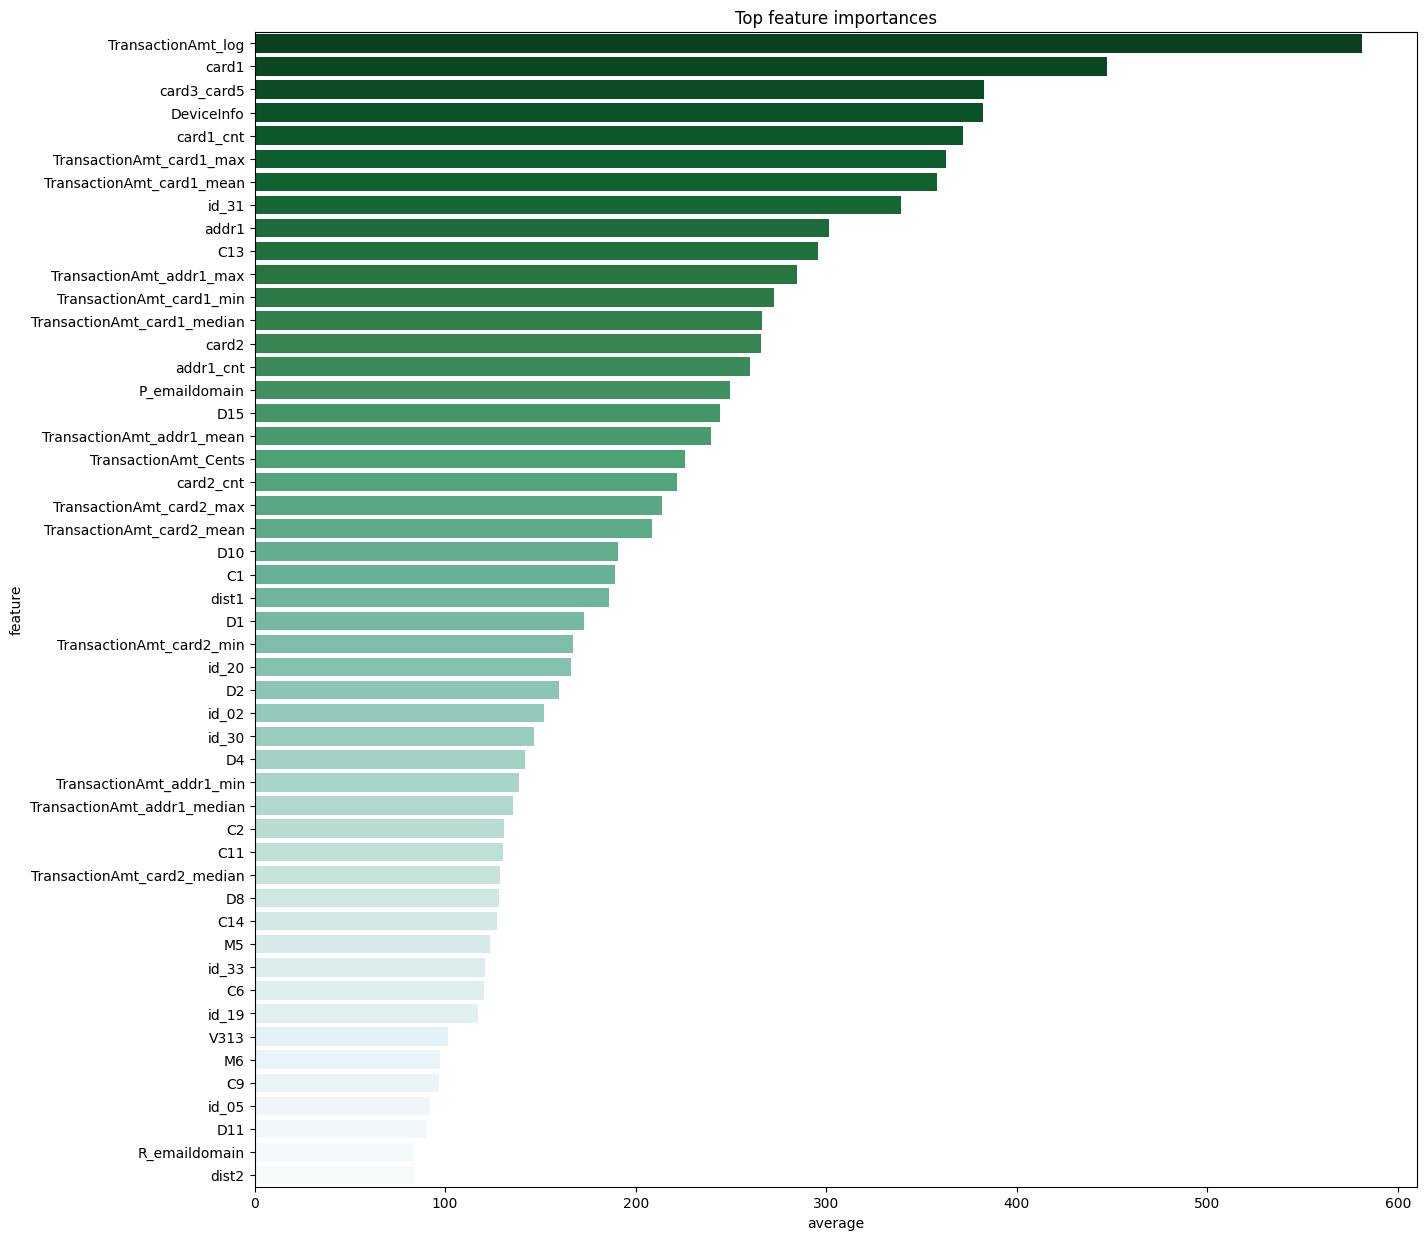

In [99]:
pipe.plot_feature_importances()

In [100]:
pipe.save_predict()

`Классы работаю корректно, перейдем к реализации методов поиска аномалий`

In [76]:
# выделю основные вещественные признаки, на основе которых буду определять аномалии
num_cols = ['TransactionAmt_log', 'card1', 'card2', 'card3', 'card5']

In [77]:
# boxplot
df_train['sum_is_outlier'] = 0
df_test['sum_is_outlier'] = 0
for col in tqdm(num_cols):
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    df_train[col+'_is_outlier'] = np.where(((df_train[col] < (Q1 - 1.5 * IQR)) | (df_train[col] > (Q3 + 1.5 * IQR))), 1, 0)
    df_test[col+'_is_outlier'] = np.where(((df_test[col] < (Q1 - 1.5 * IQR)) | (df_test[col] > (Q3 + 1.5 * IQR))), 1, 0)
    
    df_train['sum_is_outlier'] += df_train[col+'_is_outlier']
    df_test['sum_is_outlier'] += df_test[col+'_is_outlier']

100%|██████████| 5/5 [00:00<00:00, 64.85it/s]


In [78]:
pipe = LightGBMpipe(df_train=df_train, df_test=df_test)
pipe.fit()

100%|██████████| 4/4 [01:01<00:00, 15.35s/it]

Fold 0, AUC-ROC: 0.90349
Fold 1, AUC-ROC: 0.93127
Fold 2, AUC-ROC: 0.93409
Fold 3, AUC-ROC: 0.90989
CV AUC-ROC: 0.91969


In [79]:
pipe.feature_importances[pipe.feature_importances['feature'].str.endswith('is_outlier')]

,feature,fold_0,fold_1,fold_2,fold_3,average
486,sum_is_outlier,5,9,8,5,6.75
487,TransactionAmt_log_is_outlier,0,3,0,1,1.00
488,card1_is_outlier,0,0,0,0,0.00
489,card2_is_outlier,0,0,0,0,0.00
490,card3_is_outlier,0,0,0,0,0.00
491,card5_is_outlier,0,0,0,0,0.00


In [ ]:
pipe.save_predict(name='boxplot')  # качество на каггле = 0.92118

`Практически нет пользы от данных фичей`

In [81]:
data_getter = DATA_GETTER()
df_train, df_test, sample_submission = data_getter.df_train, data_getter.df_test, data_getter.sample_submission

100%|██████████| 488/488 [00:01<00:00, 303.51it/s]


In [82]:
# z-score
df_train['sum_is_outlier'] = 0
df_test['sum_is_outlier'] = 0
for col in tqdm(num_cols):
    x_mean = df_train[col].mean()
    x_std = df_train[col].std()
    z_score = (df_train[col] - x_mean) / x_std
    z_score_abs = abs(z_score)
    z_score_test = (df_test[col] - x_mean) / x_std
    z_score_test_abs = abs(z_score_test)

    df_train[col+'_is_outlier'] = np.where(z_score_abs > 3, 1, 0)
    df_train['sum_is_outlier'] += df_train[col+'_is_outlier']
    df_test[col+'_is_outlier'] = np.where(z_score_test_abs > 3, 1, 0)
    df_test['sum_is_outlier'] += df_test[col+'_is_outlier']

100%|██████████| 5/5 [00:00<00:00, 326.24it/s]


In [83]:
pipe = LightGBMpipe(df_train=df_train, df_test=df_test)
pipe.fit()
pipe.feature_importances[pipe.feature_importances['feature'].str.endswith('is_outlier')]

100%|██████████| 4/4 [01:13<00:00, 18.32s/it]

Fold 0, AUC-ROC: 0.90786
Fold 1, AUC-ROC: 0.92891
Fold 2, AUC-ROC: 0.93383
Fold 3, AUC-ROC: 0.91076
CV AUC-ROC: 0.92034


,feature,fold_0,fold_1,fold_2,fold_3,average
486,sum_is_outlier,6,2,1,1,2.50
487,TransactionAmt_log_is_outlier,2,4,3,2,2.75
488,card1_is_outlier,0,0,0,0,0.00
489,card2_is_outlier,0,0,0,0,0.00
490,card3_is_outlier,0,0,0,0,0.00
491,card5_is_outlier,1,1,0,0,0.50


In [ ]:
pipe.save_predict(name='z-score')  # качество на каггле = 0.92105

`Аналогично boxplot улучшения качества не последовало.`

In [151]:
data_getter = DATA_GETTER()
df_train, df_test, sample_submission = data_getter.df_train, data_getter.df_test, data_getter.sample_submission

100%|██████████| 488/488 [00:01<00:00, 304.75it/s]


In [8]:
X = df_train.drop(columns=['TransactionID', 'isFraud', 'TransactionDT'])
cat_cols = [col for col in X.columns if X[col].dtype in ('O', 'category')]
X.drop(cat_cols, axis=1)
X[num_cols]

,TransactionAmt_log,card1,card2,card3,card5
0,4.241327,13926,-1.0,150.0,142.0
1,3.401197,2755,404.0,150.0,102.0
2,4.094345,4663,490.0,150.0,166.0
3,3.931826,18132,567.0,150.0,117.0
4,3.931826,4497,514.0,150.0,102.0
...,...,...,...,...,...
417554,5.817111,2538,476.0,150.0,166.0
417555,5.084505,6019,583.0,150.0,226.0
417556,5.442760,5059,138.0,200.0,226.0
417557,4.663439,6697,111.0,150.0,195.0


In [3]:
data_getter = DATA_GETTER()
df_train, df_test, sample_submission = data_getter.df_train, data_getter.df_test, data_getter.sample_submission

100%|██████████| 488/488 [00:01<00:00, 291.60it/s]


In [66]:
# OneClassSVM
from sklearn.svm import OneClassSVM
data_train = df_train[num_cols]  # пробовал и на всех фичах обучать, качество отличается незначительно
clf = OneClassSVM(nu=0.05, kernel="rbf", gamma='auto', verbose=3, max_iter=10_000)
clf.fit(data_train)

pred = clf.predict(data_train)
roc_auc_score(df_train['isFraud'], pred)

[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = 36093.848327, rho = 0.950000
nSV = 20878, nBSV = 20877


0.5066477615315668

In [69]:
pred_test = clf.predict(df_test[num_cols])

In [72]:
df_train['one_class_svm_anomaly'] = pred
df_train['one_class_svm_anomaly'] = df_train['one_class_svm_anomaly'].apply(lambda anom: 1 if anom == -1 else 0)
df_train['one_class_svm_anomaly'] = df_train['one_class_svm_anomaly'].astype('category')

df_test['one_class_svm_anomaly'] = pred_test
df_test['one_class_svm_anomaly'] = df_test['one_class_svm_anomaly'].apply(lambda anom: 1 if anom == -1 else 0)
df_test['one_class_svm_anomaly'] = df_test['one_class_svm_anomaly'].astype('category')

In [73]:
pipe = LightGBMpipe(df_train=df_train, df_test=df_test)
pipe.fit()
pipe.feature_importances[pipe.feature_importances['feature'].str.endswith('anomaly')]

100%|██████████| 4/4 [01:07<00:00, 16.76s/it]

Fold 0, AUC-ROC: 0.90320
Fold 1, AUC-ROC: 0.92965
Fold 2, AUC-ROC: 0.93212
Fold 3, AUC-ROC: 0.91401
CV AUC-ROC: 0.91975


,feature,fold_0,fold_1,fold_2,fold_3,average
486,one_class_svm_anomaly,7,5,13,6,7.75


In [ ]:
pipe.save_predict(name='one_class_svm')  # качество на каггле = 0.91764

In [85]:
data_getter = DATA_GETTER()
df_train, df_test, sample_submission = data_getter.df_train, data_getter.df_test, data_getter.sample_submission

100%|██████████| 488/488 [00:01<00:00, 302.99it/s]


In [87]:
df_train['isFraud'].value_counts(True)

isFraud
0    0.964745
1    0.035255
Name: proportion, dtype: float64

In [128]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

data_train = df_train[num_cols]
clf = IsolationForest(max_samples='auto', contamination=0.035, random_state=42)  # contamination - доля выбросов в наборе данных (возьму как вес класса "1" в данных)
clf.fit(data_train)

# Предсказание
y_pred = clf.predict(data_train)
roc_auc_score(df_train['isFraud'], y_pred)

0.47025826760830164

In [129]:
y_test_pred = clf.predict(df_test[num_cols])

In [132]:
df_train['isol_forest_anomaly'] = y_pred
df_train['isol_forest_anomaly'] = df_train['isol_forest_anomaly'].apply(lambda anom: 1 if anom == -1 else 0)
df_train['isol_forest_anomaly'] = df_train['isol_forest_anomaly'].astype('category')

df_test['isol_forest_anomaly'] = y_test_pred
df_test['isol_forest_anomaly'] = df_test['isol_forest_anomaly'].apply(lambda anom: 1 if anom == -1 else 0)
df_test['isol_forest_anomaly'] = df_test['isol_forest_anomaly'].astype('category')

In [133]:
pipe = LightGBMpipe(df_train=df_train, df_test=df_test)
pipe.fit()
pipe.feature_importances[pipe.feature_importances['feature'].str.endswith('anomaly')]

100%|██████████| 4/4 [01:07<00:00, 16.93s/it]

Fold 0, AUC-ROC: 0.90857
Fold 1, AUC-ROC: 0.93050
Fold 2, AUC-ROC: 0.93267
Fold 3, AUC-ROC: 0.90942
CV AUC-ROC: 0.92029


,feature,fold_0,fold_1,fold_2,fold_3,average
486,isol_forest_anomaly,17,7,1,6,7.75


In [ ]:
pipe.save_predict(name='isolation_forest')  # качество на каггле = 0.92000

`Сравнительная таблица методов поиска аномалий:`

| Название модели             | ROC-AUC на лидерборде |
|-----------------------------|-----------------------|
| Boxplot                     | 0.92118               |
| Z-score                     | 0.92105               |
| OneClassSVM                 | 0.91764               |
| IsolationForest             | 0.92000               |

# **Задание 4 (1 балл)**

Сделайте кластеризацию различными способами. Результаты кластеризации используйте для улучшения ML-решений:

1) Номера кластеров закодируйте (OHE или target-encoding) и добавьте как новые признаки

2) При использовании DBSCAN / HDBSCAN предсказанный шум можно трактовать как найденную аномалию и также добавить ее как новый признак

Проведите различные эксперименты. Проверьте как эти подходы влияют на качество прогнозов по кросс-валидации и на лидерборде, сделайте выводы.

`Попробуем несколько алгоритмов кластеризации`:

- KMeans

- HDBSCAN

- AgglomerativeClustering

In [135]:
data_getter = DATA_GETTER()
df_train, df_test, sample_submission = data_getter.df_train, data_getter.df_test, data_getter.sample_submission

100%|██████████| 488/488 [00:01<00:00, 313.34it/s]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
train_data_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_cols]), columns=num_cols)
for n in range(2, 8):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(train_data_scaled)
    silh = silhouette_score(train_data_scaled, kmeans.labels_)
    print(f'при n_clusters={n} коэффициент силуэта={silh}')

при n_clusters=2 коэффициент силуэта=0.18319569396125907
при n_clusters=3 коэффициент силуэта=0.20815035146463298
при n_clusters=4 коэффициент силуэта=0.19087622000709317
при n_clusters=5 коэффициент силуэта=0.19354853015619555
при n_clusters=6 коэффициент силуэта=0.22607095304242789
при n_clusters=7 коэффициент силуэта=0.23518568791892955


`Наибольший коэффициент Силуэта при n_clusters=7`

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(train_data_scaled)
# добавим номер кластера как новую фичу в модель
df_train['cluster'] = kmeans.labels_
df_train['cluster'].value_counts()

cluster
2    97207
0    79892
3    79333
1    48064
6    45155
5    43010
4    24898
Name: count, dtype: int64

In [ ]:
roc_auc_score(df_train['isFraud'], df_train['cluster'].isin([4, 5]))  # как будто 4 и 5 кластеры - это кластеры с аномальными сессиями

0.6304361033806491

In [171]:
test_data_scaled = pd.DataFrame(scaler.transform(df_test[num_cols]), columns=num_cols)
test_clusters = kmeans.predict(test_data_scaled)
df_test['cluster'] = test_clusters

ohe_clusters = OneHotEncoder(sparse_output=False)
train_clusters_encoded = pd.DataFrame(ohe_clusters.fit_transform(df_train[['cluster']]), columns=ohe_clusters.get_feature_names_out())
test_clusters_encoded = pd.DataFrame(ohe_clusters.transform(df_test[['cluster']]), columns=ohe_clusters.get_feature_names_out())

df_train = pd.concat([df_train.drop('cluster', axis=1), train_clusters_encoded], axis=1)
df_test = pd.concat([df_test.drop('cluster', axis=1), test_clusters_encoded], axis=1)

In [ ]:
pipe = LightGBMpipe(df_train=df_train, df_test=df_test)
pipe.fit()
pipe.feature_importances[pipe.feature_importances['feature'].str.startswith('cluster')]

,feature,fold_0,fold_1,fold_2,fold_3,average
486,cluster_0,15,20,18,11,16.00
487,cluster_1,12,23,13,8,14.00
488,cluster_2,11,15,22,9,14.25
489,cluster_3,12,25,18,11,16.50
490,cluster_4,5,6,13,6,7.50
491,cluster_5,0,0,0,0,0.00
492,cluster_6,20,14,3,6,10.75


In [ ]:
pipe.save_predict(name='KMeans')  # качество на каггле = 0.92004

In [209]:
data_getter = DATA_GETTER()
df_train, df_test, sample_submission = data_getter.df_train, data_getter.df_test, data_getter.sample_submission
scaler = StandardScaler()
train_data_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_cols]), columns=num_cols)
test_data_scaled = pd.DataFrame(scaler.transform(df_test[num_cols]), columns=num_cols)

100%|██████████| 488/488 [00:01<00:00, 318.60it/s]


In [178]:
!pip install hdbscan -q

In [216]:
import hdbscan
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=2_000, prediction_data=True)
h_clusters_train = hdbscan_model.fit_predict(train_data_scaled)
h_clusters_test, strengths = hdbscan.approximate_predict(hdbscan_model, test_data_scaled)

In [218]:
df_train['h_cluster'] = h_clusters_train
df_test['h_cluster'] = h_clusters_test

In [224]:
hdb_clusters = OneHotEncoder(sparse_output=False)
train_clusters_encoded = pd.DataFrame(hdb_clusters.fit_transform(df_train[['h_cluster']]), columns=hdb_clusters.get_feature_names_out())
test_clusters_encoded = pd.DataFrame(hdb_clusters.transform(df_test[['h_cluster']]), columns=hdb_clusters.get_feature_names_out())

df_train = pd.concat([df_train.drop('h_cluster', axis=1), train_clusters_encoded], axis=1)
df_test = pd.concat([df_test.drop('h_cluster', axis=1), test_clusters_encoded], axis=1)

In [225]:
pipe = LightGBMpipe(df_train=df_train, df_test=df_test)
pipe.fit()
pipe.feature_importances[pipe.feature_importances['feature'].str.startswith('h_cluster')]

100%|██████████| 4/4 [01:05<00:00, 16.45s/it]

Fold 0, AUC-ROC: 0.90432
Fold 1, AUC-ROC: 0.93002
Fold 2, AUC-ROC: 0.92977
Fold 3, AUC-ROC: 0.91065
CV AUC-ROC: 0.91869


,feature,fold_0,fold_1,fold_2,fold_3,average
486,h_cluster_-1,18,3,13,6,10.00
487,h_cluster_0,1,2,10,8,5.25
488,h_cluster_1,2,3,4,0,2.25
489,h_cluster_2,14,6,13,6,9.75
490,h_cluster_3,11,5,12,6,8.50


In [ ]:
pipe.save_predict(name='hdbscan')  # качество на каггле = 0.91869

In [5]:
data_getter = DATA_GETTER()
df_train, df_test, sample_submission = data_getter.df_train, data_getter.df_test, data_getter.sample_submission
num_cols = ['TransactionAmt_log', 'card1', 'card2', 'card3', 'card5']
scaler = StandardScaler()
train_data_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_cols]), columns=num_cols)
test_data_scaled = pd.DataFrame(scaler.transform(df_test[num_cols]), columns=num_cols)

100%|██████████| 488/488 [00:01<00:00, 310.54it/s]


In [6]:
data_scaled = pd.concat([train_data_scaled, test_data_scaled], axis=0).reset_index(drop=True)

In [7]:
from sklearn.cluster import AgglomerativeClustering

aggl_single = AgglomerativeClustering(n_clusters=7, linkage='single')
# aggl_ward = AgglomerativeClustering(n_clusters=7, linkage='ward')

clusters_aggl_single = aggl_single.fit_predict(data_scaled)
# clusters_aggl_ward = aggl_ward.fit_predict(data_scaled)

In [26]:
train_clusters_aggl =  pd.Series(clusters_aggl_single).iloc[:train_data_scaled.shape[0]]
test_clusters_aggl = pd.Series(clusters_aggl_single).iloc[train_data_scaled.shape[0]:].reset_index(drop=True)

df_train['aggl_cluster'] = train_clusters_aggl
df_test['aggl_cluster'] = test_clusters_aggl

In [32]:
aggls_clusters = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
train_clusters_encoded = pd.DataFrame(aggls_clusters.fit_transform(df_train[['aggl_cluster']]), columns=aggls_clusters.get_feature_names_out())
test_clusters_encoded = pd.DataFrame(aggls_clusters.transform(df_test[['aggl_cluster']]), columns=aggls_clusters.get_feature_names_out())

df_train = pd.concat([df_train.drop('aggl_cluster', axis=1), train_clusters_encoded], axis=1)
df_test = pd.concat([df_test.drop('aggl_cluster', axis=1), test_clusters_encoded], axis=1)

In [33]:
pipe = LightGBMpipe(df_train=df_train, df_test=df_test)
pipe.fit()
pipe.feature_importances[pipe.feature_importances['feature'].str.startswith('aggl_cluster')]

100%|██████████| 4/4 [01:03<00:00, 15.78s/it]

Fold 0, AUC-ROC: 0.90607
Fold 1, AUC-ROC: 0.93266
Fold 2, AUC-ROC: 0.93298
Fold 3, AUC-ROC: 0.91113
CV AUC-ROC: 0.92071


,feature,fold_0,fold_1,fold_2,fold_3,average
486,aggl_cluster_0,0,0,0,0,0.0
487,aggl_cluster_1,0,1,0,1,0.5
488,aggl_cluster_2,0,0,0,0,0.0
489,aggl_cluster_3,0,0,0,0,0.0
490,aggl_cluster_4,0,0,0,0,0.0
491,aggl_cluster_6,0,0,0,0,0.0


In [ ]:
pipe.save_predict(name='agglomerative')  # качество на каггле = 0.92064

`Сравнительная таблица методов кластеризации:`

| Название модели             | ROC-AUC на лидерборде |
|-----------------------------|-----------------------|
| KMeans                     | 0.92004               |
| HDBSCAN                     | 0.91869              |
| AgglomerativeClustering                 | 0.92064               |


## **Задание 5 (1 балл)**

Примените какой-нибудь (один любой) AutoML фреймворк для решения поставленной задачи.

Отправьте AutoML-прогноз на kaggle и посмотрите на качество модели. Сделайте текстовые выводы.

In [3]:
# !pip install autogluon -q
# !pip install scikit-learn==1.5.2

In [3]:
data_getter = DATA_GETTER()
df_train, df_test, sample_submission = data_getter.df_train, data_getter.df_test, data_getter.sample_submission

100%|██████████| 488/488 [00:01<00:00, 304.33it/s]


In [4]:
train_data = TabularDataset(df_train.drop(columns=['TransactionID', 'TransactionDT']).sample(200_000, random_state=42))  # все данные не помещаются в RAM, поэтому беру только половину данных
predictor = TabularPredictor(label='isFraud')
predictor.fit(train_data=train_data, excluded_model_types=['FASTAI', 'NN_TORCH'], presets='best')  # выкинул нейронки, ибо на них все ломается и зависает

No path specified. Models will be saved in: "AutogluonModels/ag-20250311_163343"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.15
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:30:59 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6030
CPU Count:          12
Memory Avail:       22.78 GB / 36.00 GB (63.3%)
Disk Space Avail:   756.10 GB / 926.35 GB (81.6%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequ

(_ray_fit pid=3042) [1000]	valid_set's binary_error: 0.0186743
(_ray_fit pid=3045) [2000]	valid_set's binary_error: 0.0168302 [repeated 4x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=3045) [3000]	valid_set's binary_error: 0.0164702 [repeated 4x across cluster]
(_ray_fit pid=3045) [4000]	valid_set's binary_error: 0.0162002 [repeated 3x across cluster]
(_ray_fit pid=3059) [1000]	valid_set's binary_error: 0.0175952 [repeated 3x across cluster]
(_ray_fit pid=3045) [5000]	valid_set's binary_error: 0.0161102
(_ray_fit pid=3044) [5000]	valid_set's binary_error: 0.0157952
(_ray_fit pid=3044) [6000]	valid_set's binary_error: 0.0154802 [repeated 2x across cluster]
(_ray_fit pid=3066) [1000]	valid_set's binary_error: 0.0181802 [repeated 2x across cluster]
(_ray_fit pid=3044) [7000]	valid_set's binary_

(_ray_fit pid=3044) 	Ran out of time, early stopping on iteration 8899. Best iteration is:
(_ray_fit pid=3044) 	[8786]	valid_set's binary_error: 0.0148501


(_ray_fit pid=3072) [3000]	valid_set's binary_error: 0.0155702
(_ray_fit pid=3059) [6000]	valid_set's binary_error: 0.0143101
(_ray_fit pid=3072) [4000]	valid_set's binary_error: 0.0150302 [repeated 2x across cluster]
(_ray_fit pid=3082) [1000]	valid_set's binary_error: 0.0180002 [repeated 2x across cluster]
(_ray_fit pid=3072) [5000]	valid_set's binary_error: 0.0148051
(_ray_fit pid=3059) [8000]	valid_set's binary_error: 0.0140851
(_ray_fit pid=3082) [2000]	valid_set's binary_error: 0.0164702
(_ray_fit pid=3072) [6000]	valid_set's binary_error: 0.0145351
(_ray_fit pid=3082) [3000]	valid_set's binary_error: 0.0158852 [repeated 2x across cluster]


(_ray_fit pid=3059) 	Ran out of time, early stopping on iteration 9419. Best iteration is:
(_ray_fit pid=3059) 	[7341]	valid_set's binary_error: 0.0139051


(_ray_fit pid=3072) [7000]	valid_set's binary_error: 0.0144001
(_ray_fit pid=3082) [4000]	valid_set's binary_error: 0.0155252
(_ray_fit pid=3072) [8000]	valid_set's binary_error: 0.0144901
(_ray_fit pid=3082) [5000]	valid_set's binary_error: 0.0152102
(_ray_fit pid=3072) [9000]	valid_set's binary_error: 0.0143551
(_ray_fit pid=3082) [6000]	valid_set's binary_error: 0.0147601
(_ray_fit pid=3082) [7000]	valid_set's binary_error: 0.0147601
(_ray_fit pid=3082) [8000]	valid_set's binary_error: 0.0145801
(_ray_fit pid=3082) [9000]	valid_set's binary_error: 0.0144451
(_ray_fit pid=3082) [10000]	valid_set's binary_error: 0.0143551


(_dystack pid=2943) 	0.9848	 = Validation score   (accuracy)
(_dystack pid=2943) 	296.08s	 = Training   runtime
(_dystack pid=2943) 	22.44s	 = Validation runtime
(_dystack pid=2943) Fitting model: LightGBM_BAG_L1 ... Training model for up to 110.58s of the 409.24s of remaining time.
(_dystack pid=2943) 	Memory not enough to fit 8 folds in parallel. Will train 4 folds in parallel instead (Estimated 17.68% memory usage per fold, 70.73%/80.00% total).
(_dystack pid=2943) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=3, gpus=0, memory=17.68%)


(_ray_fit pid=3107) [1000]	valid_set's binary_error: 0.0179102
(_ray_fit pid=3110) [1000]	valid_set's binary_error: 0.0177302
(_ray_fit pid=3110) [2000]	valid_set's binary_error: 0.0163802 [repeated 3x across cluster]


(_ray_fit pid=3108) 	Ran out of time, early stopping on iteration 2106. Best iteration is:
(_ray_fit pid=3108) 	[1916]	valid_set's binary_error: 0.0152995


(_ray_fit pid=3122) [1000]	valid_set's binary_error: 0.0166502 [repeated 4x across cluster]
(_ray_fit pid=3121) [2000]	valid_set's binary_error: 0.0153452 [repeated 4x across cluster]


(_ray_fit pid=3121) 	Ran out of time, early stopping on iteration 2131. Best iteration is: [repeated 4x across cluster]
(_ray_fit pid=3121) 	[1681]	valid_set's binary_error: 0.0153002 [repeated 4x across cluster]
(_dystack pid=2943) 	0.9846	 = Validation score   (accuracy)
(_dystack pid=2943) 	91.14s	 = Training   runtime
(_dystack pid=2943) 	10.49s	 = Validation runtime
(_dystack pid=2943) Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 16.40s of the 315.07s of remaining time.
(_dystack pid=2943) 	Not enough time to generate out-of-fold predictions for model. Estimated time required was 10.83s compared to 10s of available time.
(_dystack pid=2943) 	Time limit exceeded... Skipping RandomForestGini_BAG_L1.
(_ray_fit pid=3123) 	Ran out of time, early stopping on iteration 2113. Best iteration is: [repeated 3x across cluster]
(_ray_fit pid=3123) 	[2057]	valid_set's binary_error: 0.0148951 [repeated 3x across cluster]
(_dystack pid=2943) Fitting model: WeightedEnsemble_

In [5]:
# качество на трейне
pred = predictor.predict(df_train.drop(['isFraud', 'TransactionID', 'TransactionDT'], axis=1))
roc_auc_score(df_train['isFraud'], pred)

0.9265713461786262

In [6]:
# делаем сабмишн для каггла
name = 'autogluon3'
pred = predictor.predict(df_test.drop(['TransactionID', 'TransactionDT'], axis=1))
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': pred})
sub.to_csv('submissions/' + name + '.csv', index=False)

`Получил качество на каггле - 0.71365, что намного хуже модели LightGBM...`

# **Задание 6 (1 балл)**

Весь курс мы работали в Google Colab. Но всегда должны быть запасные варианты, где Вы будете обучать модели.

Среди вариантов есть:
* ваша локальная машина
* kaggle notebooks
* yandex cloud
и другие.

Кроме привычного Google Colab выберите из списка выше один любой альтернативный вариант и проведите эксперимент:

* Прогоните ваш лучший по качеству по результатам заданий 2-4 ML-пайплайн заново в Google Colab и с помощью библиотек (например, при помощи библиотеки time) замерьте время обучения и отдельно время инференса на тестовых данных

* Прогоните этот пайплайн на выбранном альтернативном сервисе/локальной машине и также замерьте время обучения и инференса.

Текстом напишите выводы: опишите, какое альтернативное место для обучения моделей Вы использовали? Прикрепите прямо в ноутбук скриншот с экраном кода в альтернативном сервисе/на локальной машине. Также в виде таблицы приведите сравнение времени обучения и инференса в колабе и в альтернативном месте. Сделайте выводы.

In [8]:
# так как классы уже написаны с нужными функциями, тогда сразу замерим на них время
# локальная реализация:
t1 = time.time()
data_getter = DATA_GETTER()
df_train, df_test, sample_submission = data_getter.df_train, data_getter.df_test, data_getter.sample_submission
t2 = time.time()
print(f'Время, затраченное на загрузку и предобработку данных: {round(t2 - t1)} секунд')
pipe = LightGBMpipe(df_train=df_train, df_test=df_test)
pipe.fit()
t3 = time.time()
print(f'Время, затраченное на обучение модели на кросс-валидации: {round(t3 - t2)} секунд')
print(f'Время на весь пайплайн: {round(t3 - t1)} секунд')

100%|██████████| 488/488 [00:01<00:00, 324.76it/s]


Время, затраченное на загрузку и предобработку данных: 35 секунд


100%|██████████| 4/4 [01:05<00:00, 16.26s/it]

Fold 0, AUC-ROC: 0.90607
Fold 1, AUC-ROC: 0.93266
Fold 2, AUC-ROC: 0.93298
Fold 3, AUC-ROC: 0.91113
CV AUC-ROC: 0.92071
Время, затраченное на обучение модели на кросс-валидации: 66 секунд
Время на весь пайплайн: 102 секунд


Реализация в коллабе:

![Снимок экрана 2025-03-11 в 23.50.58.png](<attachment:Снимок экрана 2025-03-11 в 23.50.58.png>) 
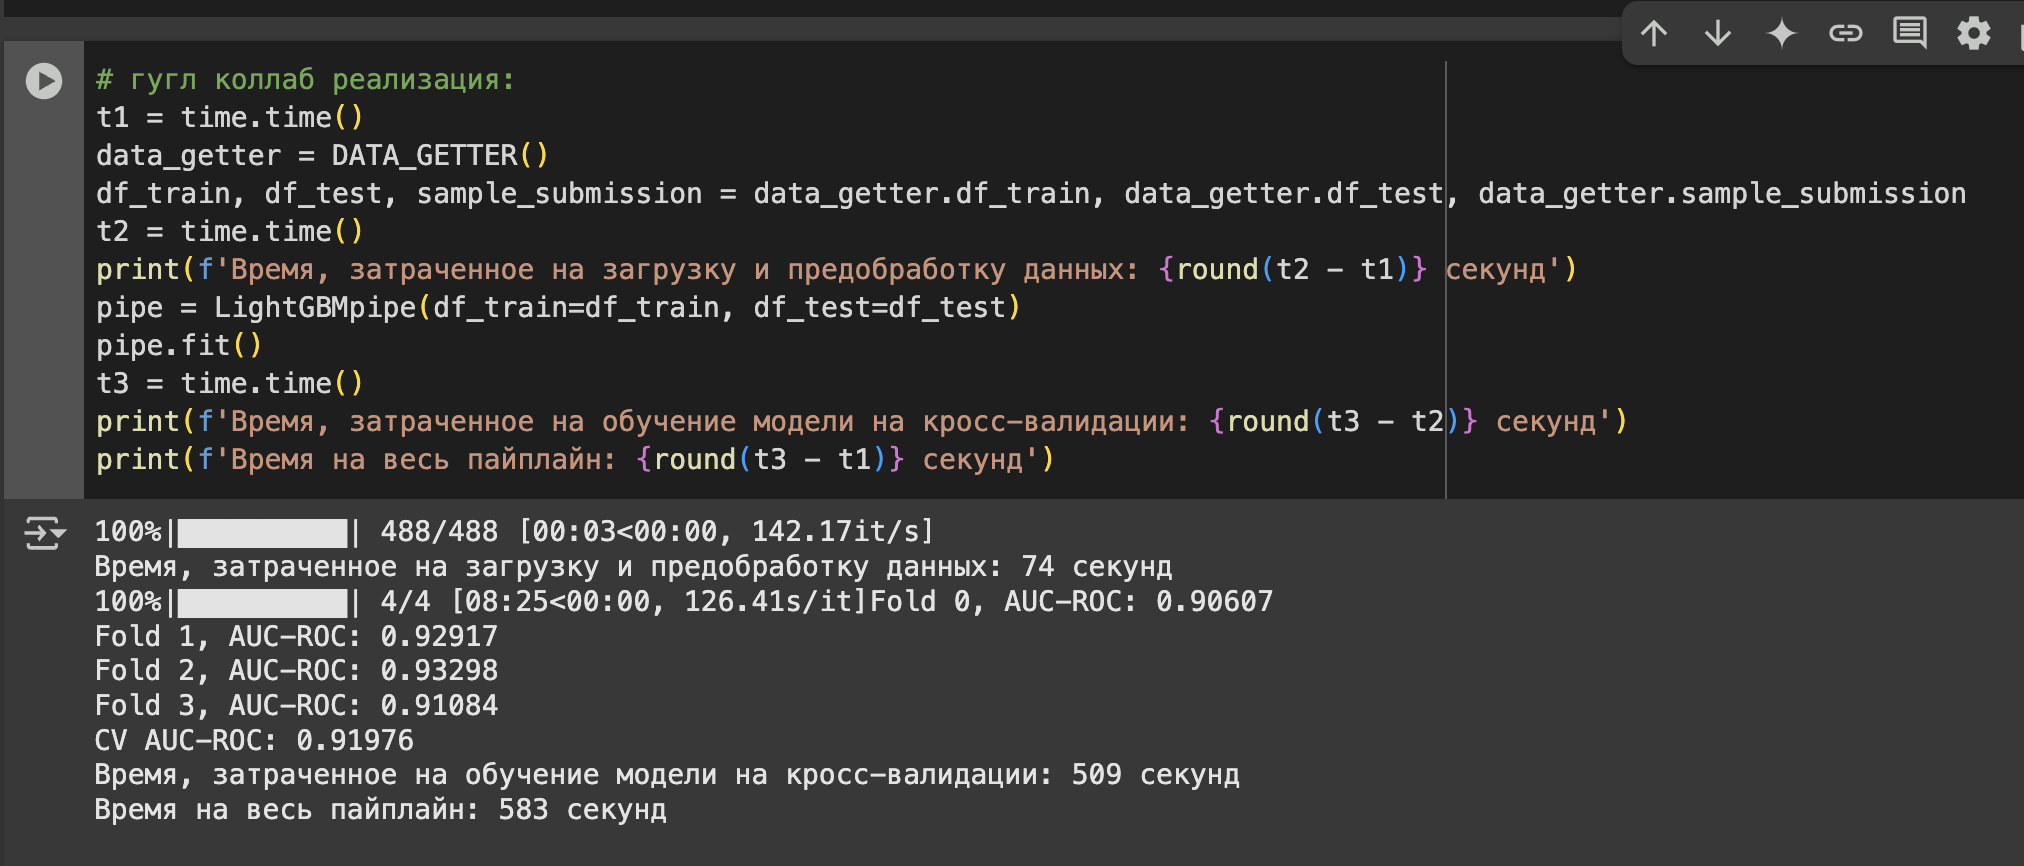

Реализация в датасфере (c1.32: 32 CPU, 256 RAM): 

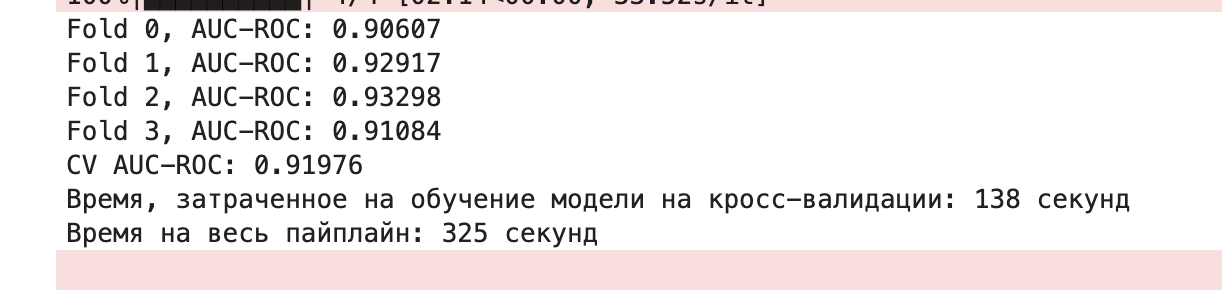

`Видно, что локально вычисления происходят намного быстрее прочих вариантов.`

# **Бонус: за Kaggle и стремление к хорошим скорам (2 балла)**

В этом домашнем задании Ваша цель - не просто выполнить шаги выше, но и построить максимально хорошую по качеству модель.

**К 10 вы можете получить до двух дополнительных баллов:**

* За попадание в топ-20% на private leaderboard — +1 дополнительный балл к оценке
* За попадание в топ-5 мест на private leaderboard — + еще один дополнительный балл к оценке (то есть суммарно 2 дополнительных балла)

**ВАЖНО!!!**

Эти баллы ставятся до мягкого дедлайна по соревнованию. После мягкого дедлайна лидерборд не обновляется, и дополнительные баллы не ставятся.

Успехов!

`В моменте был на первом месте :)`

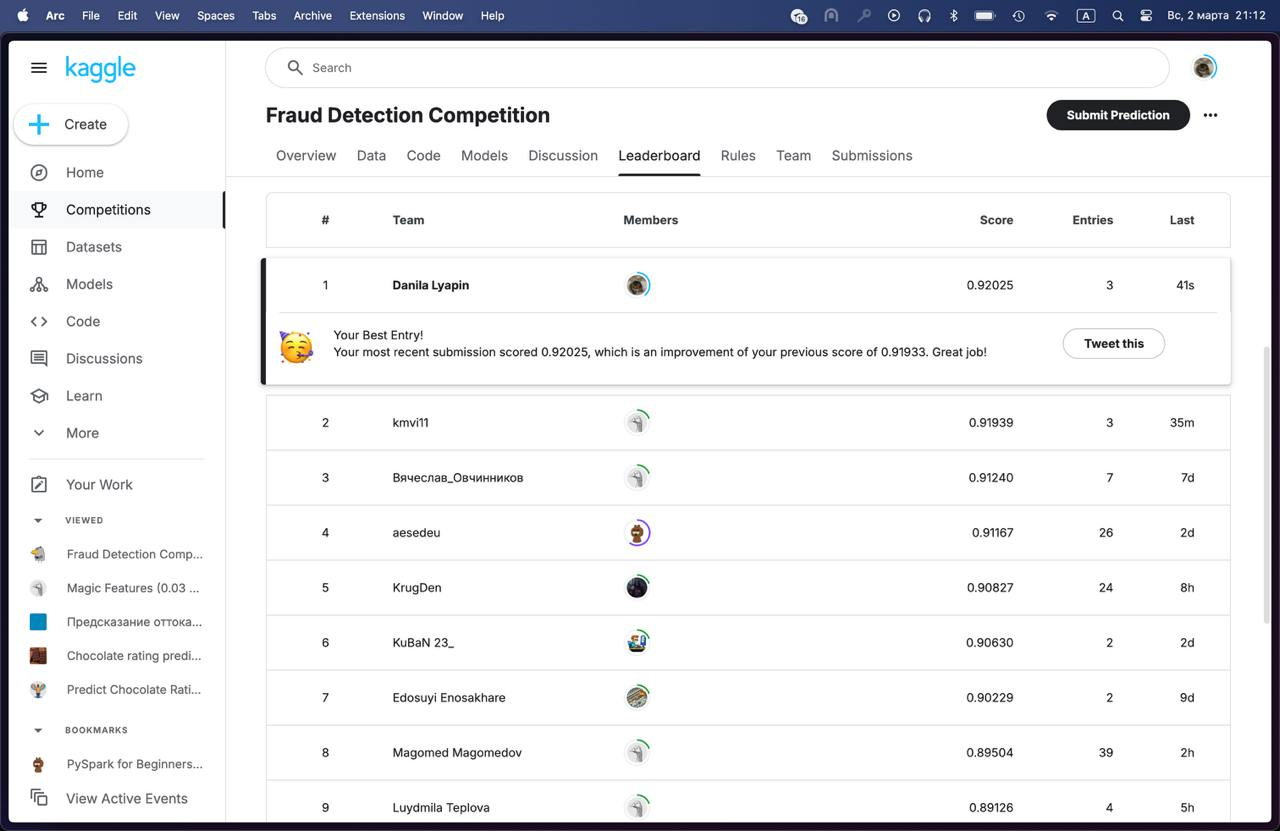